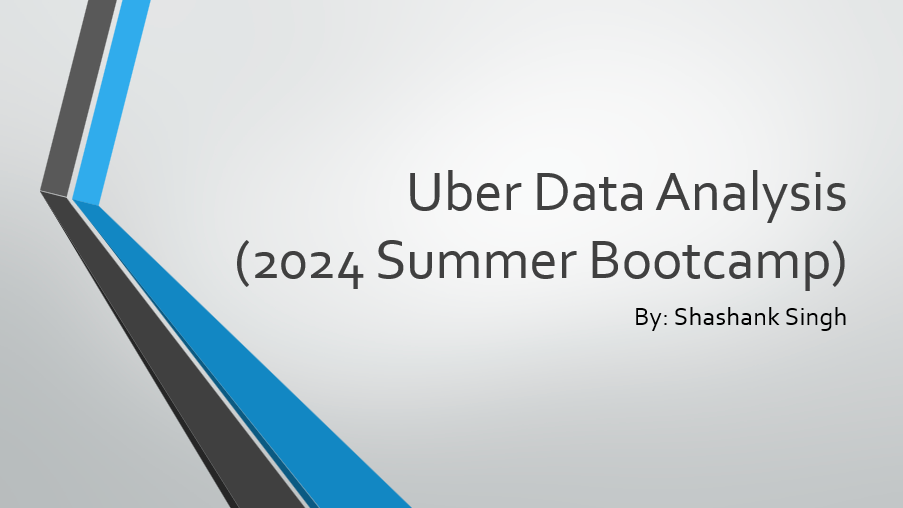

# Index
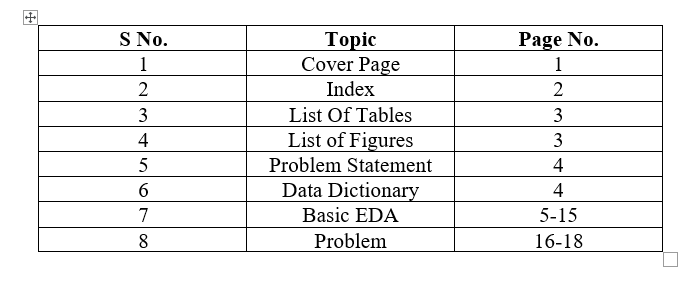

# Problem Statement

The data contains the details for the Uber rides across various boroughs (subdivisions) of New York City at an hourly level and attributes associated with weather conditions at that time.

# Importing the Important libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [4]:
df = pd.read_csv("Uber_Data_New.csv")

# 1- Display first five rows of the dataset

In [7]:
df.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,1/1/2015 1:00,Bronx,152.0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,1/1/2015 1:00,Brooklyn,1519.0,5.0,10.0,NaN,7.0,1023.5,0.0,0.0,0.0,0.0,?
2,1/1/2015 1:00,EWR,0.0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,1/1/2015 1:00,Manhattan,5258.0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,1/1/2015 1:00,Queens,405.0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


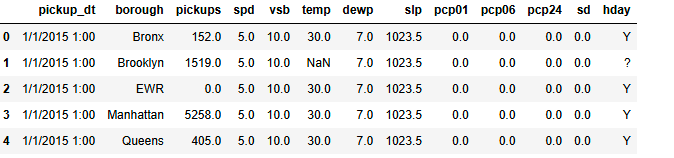

## Observations:
* First five rows of the dataset
* In first five rows we can see a "?" in the hday values.

# 2- Display last five rows of the dataset

In [112]:
df.tail()

,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,hour,day_of_week,season,is_holiday,is_rush_hour,is_late_night,is_weekend,month
pickup_dt,,,,,,,,,,,,,,,,,,,,
2015-06-30 23:00:00,EWR,0.0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,23,Tuesday,Summer,False,False,False,False,6
2015-06-30 23:00:00,Manhattan,1121.0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,23,Tuesday,Summer,False,False,False,False,6
2015-06-30 23:00:00,Queens,580.0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,23,Tuesday,Summer,False,False,False,False,6
2015-06-30 23:00:00,Staten Island,0.0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,23,Tuesday,Summer,False,False,False,False,6
2015-06-30 23:00:00,Bronx,3.0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,23,Tuesday,Summer,False,False,False,False,6


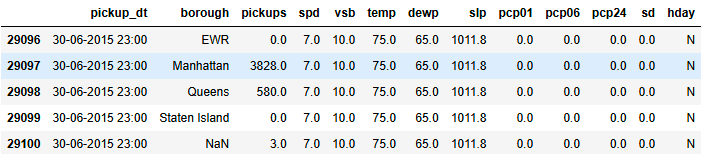

# 3- Check for shape of the dataset

In [9]:
df.shape

(29101, 13)

## Observations:
* There are 29101 number of rows in our dataset and 13 columns

# 4- Check the datatypes of each feature.

In [10]:
df.dtypes

pickup_dt     object
borough       object
pickups      float64
spd          float64
vsb          float64
temp         float64
dewp         float64
slp          float64
pcp01        float64
pcp06        float64
pcp24        float64
sd           float64
hday          object
dtype: object

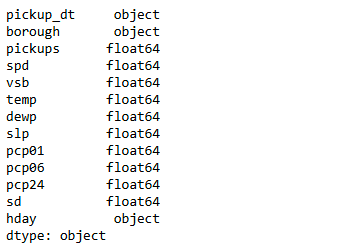

## Observations:
* The pickup_dt column should be in date-time format

# 5- Check the Statistical summary 

In [11]:
df.describe()

,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd
count,29099.000000,29101.000000,29101.000000,28742.000000,29101.000000,2.910100e+04,29101.000000,29101.000000,29101.000000,29101.000000
mean,490.236022,5.984924,8.818125,47.900262,30.823065,1.052633e+03,0.003830,0.026129,0.090464,2.529169
std,995.680628,3.699007,2.442897,19.800541,21.283444,5.945147e+03,0.018933,0.093125,0.219402,4.520325
min,0.000000,0.000000,0.000000,0.000000,-16.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,9.100000,32.000000,14.000000,1.012500e+03,0.000000,0.000000,0.000000,0.000000
50%,54.000000,6.000000,10.000000,46.500000,30.000000,1.018200e+03,0.000000,0.000000,0.000000,0.000000
75%,449.000000,8.000000,10.000000,65.000000,50.000000,1.022900e+03,0.000000,0.000000,0.050000,2.958333
max,7883.000000,21.000000,10.000000,89.000000,73.000000,1.015200e+06,0.280000,1.240000,2.100000,19.000000


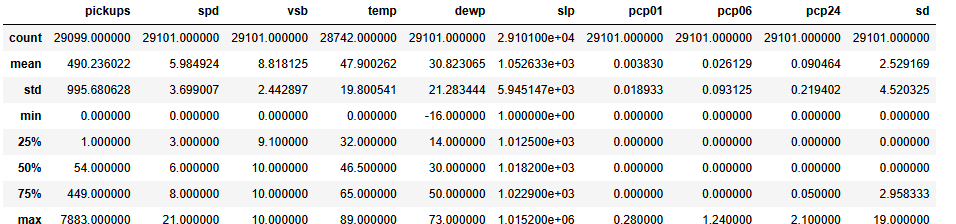

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29099 non-null  float64
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       28742 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(10), object(3)
memory usage: 2.9+ MB


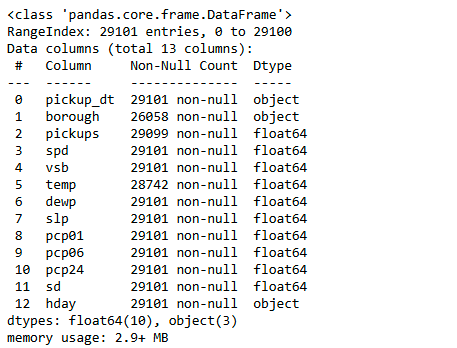

# 6- Check the null values

In [12]:
df.isnull().sum()

pickup_dt       0
borough      3043
pickups         2
spd             0
vsb             0
temp          359
dewp            0
slp             0
pcp01           0
pcp06           0
pcp24           0
sd              0
hday            0
dtype: int64

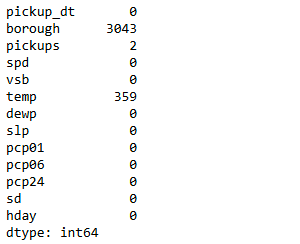

## Observations:
* There are 3043 null values in our dataset in borough column.
* There are 2 null values in pickup column and 359 null values in the temp column of the dataset.

# 7- Check the duplicate values

In [13]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


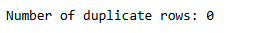

# 8- Check for outliers and their authenticity

## Methods for checking outliers:

* ### Box Plot:
    A graphical representation that shows the distribution of the data and identifies outliers as points that fall outside the whiskers.
* ### Z-Score:
    Calculates how many standard deviations a data point is from the mean. Typically, a Z-score above 3 or below -3 is  considered an outlier.
* ### IQR (Interquartile Range) Method:
    Data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR are considered outliers

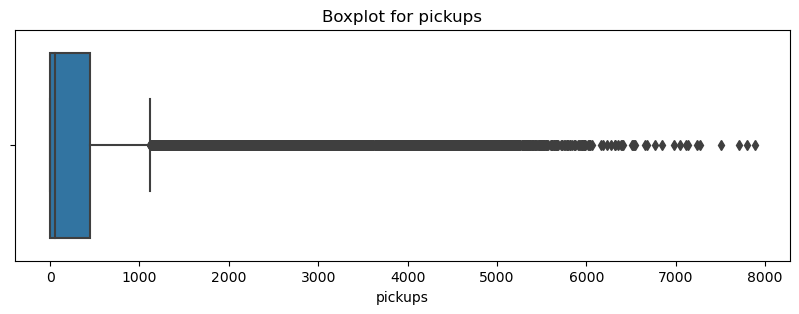

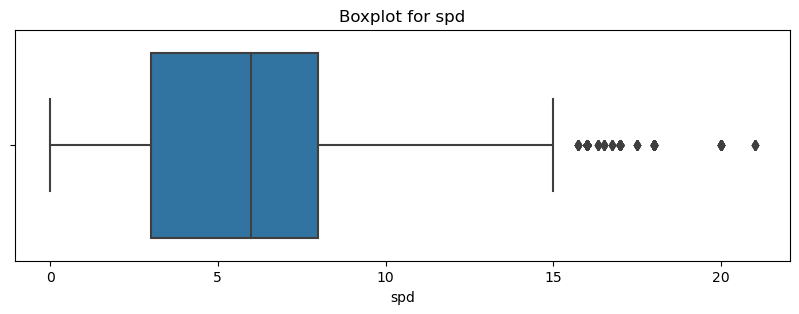

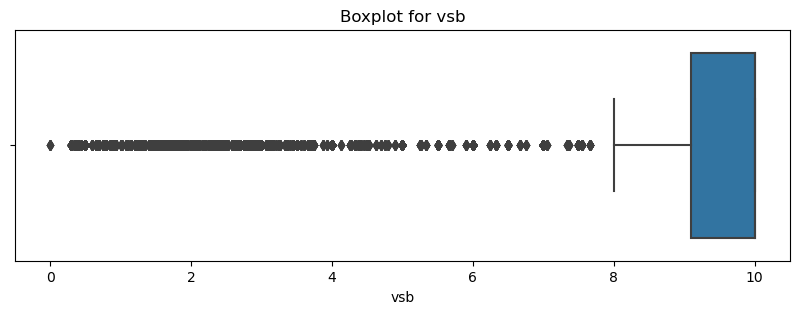

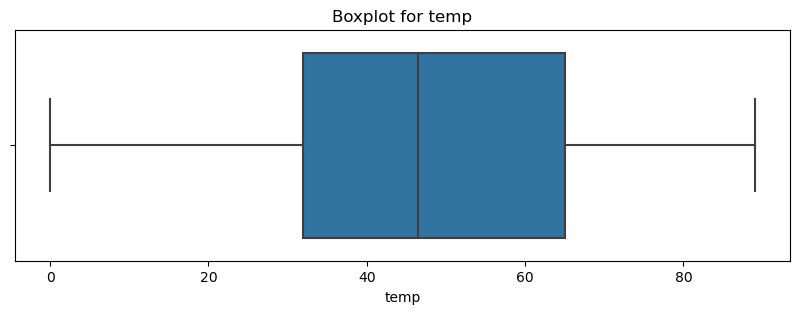

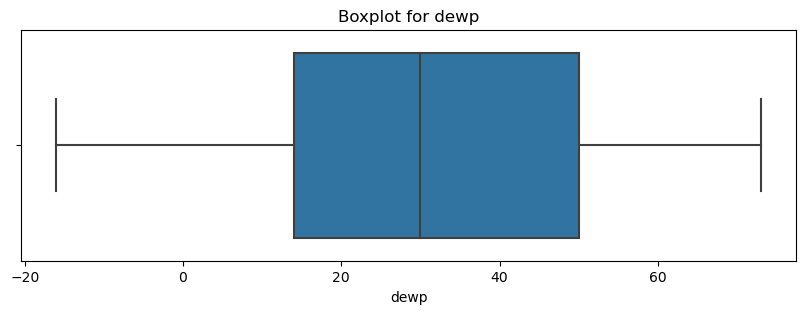

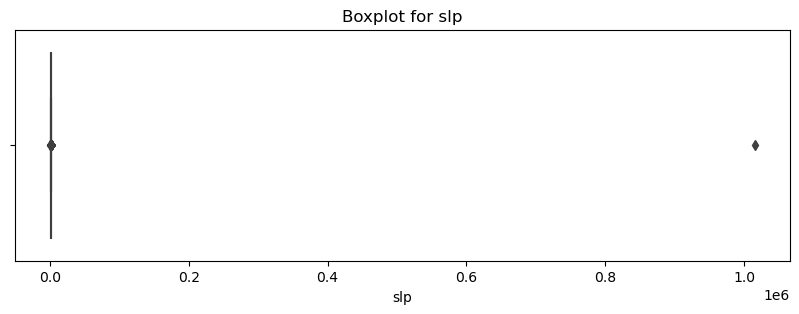

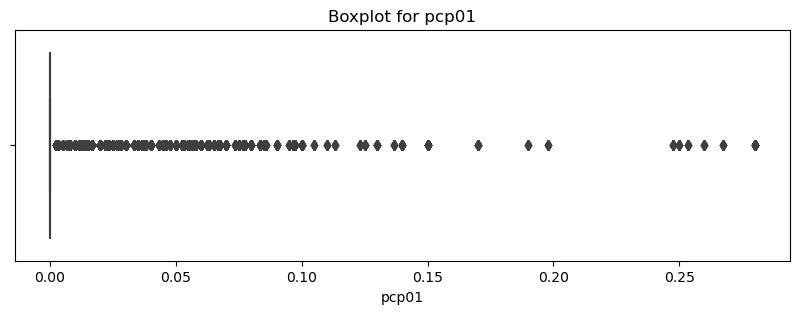

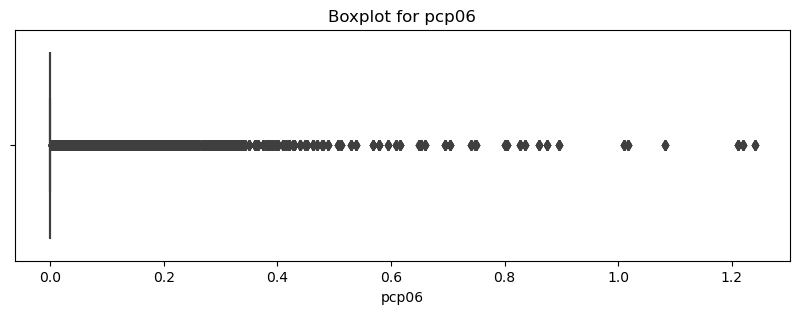

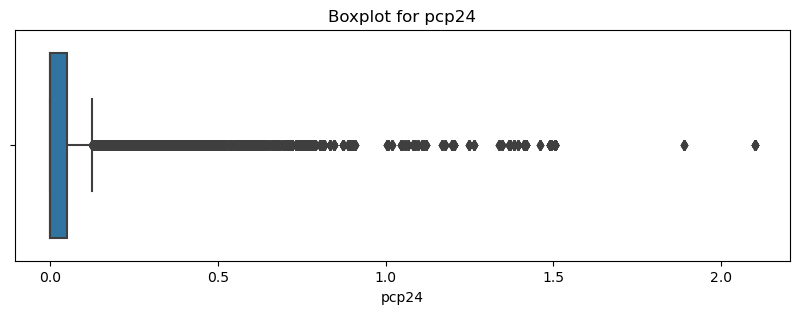

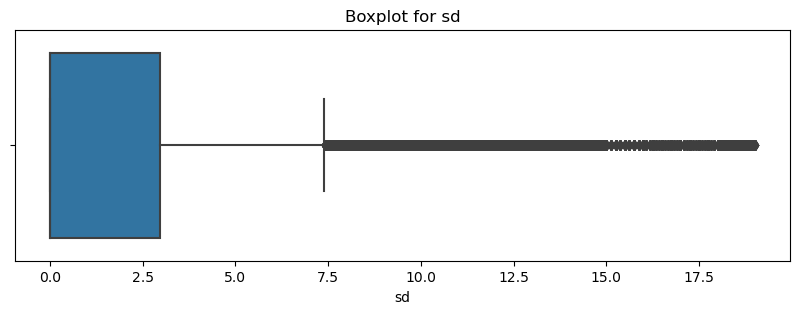

In [30]:
# Visualize the data to identify outliers using Box Plot
numerical_columns = df.select_dtypes(include=['float64']).columns

for column in numerical_columns:
    plt.figure(figsize=(10, 3))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

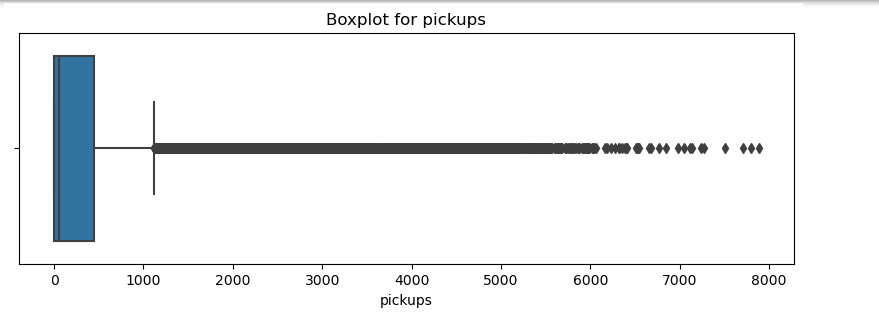

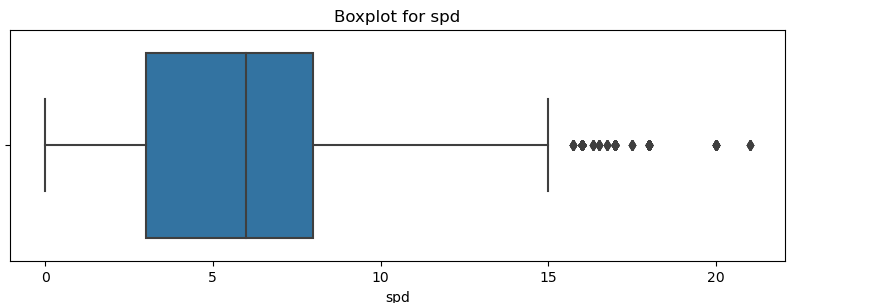

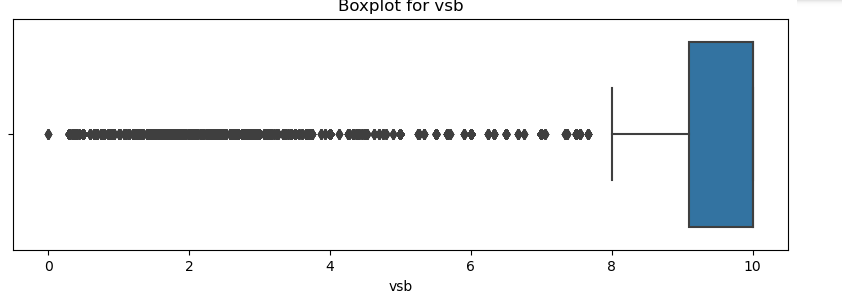

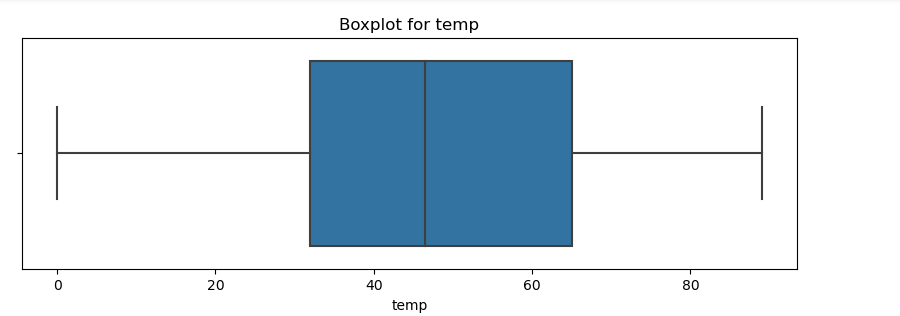

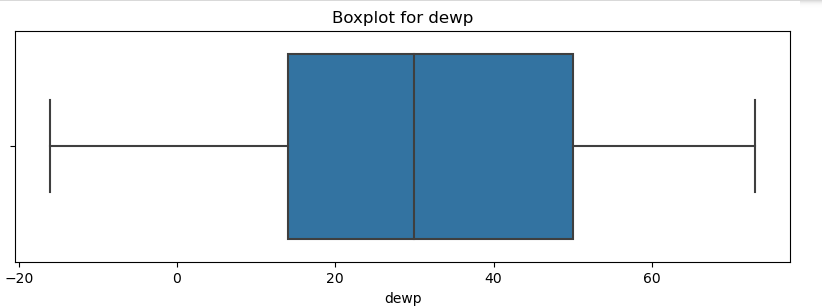

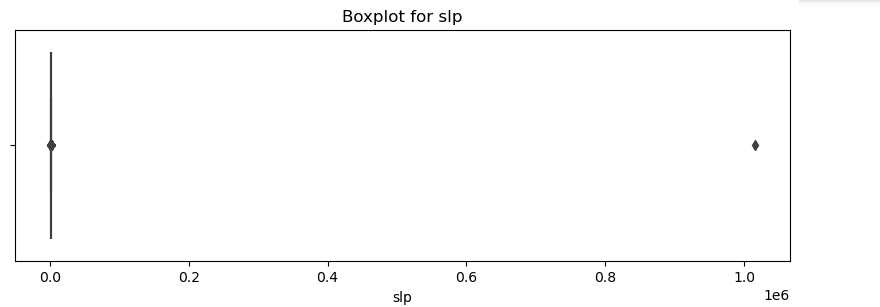

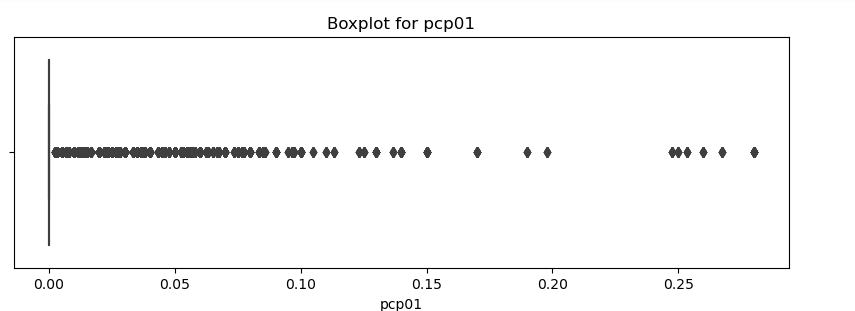

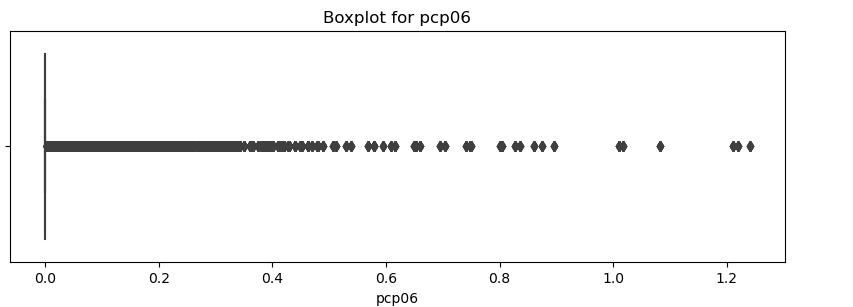

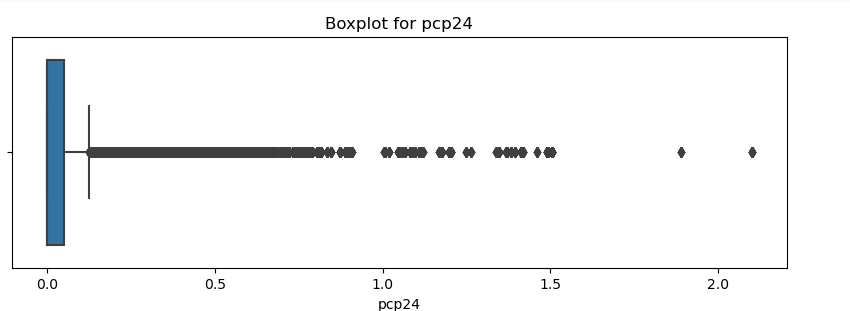

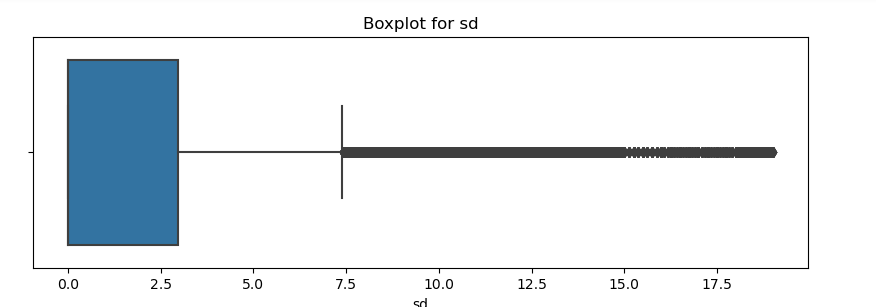

In [31]:
# Using IQR method to detect outliers
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

for col in numerical_columns:
    outliers = find_outliers_iqr(df, col)
    print(f"Number of outliers in {col}: {outliers.shape[0]}")

Number of outliers in pickups: 3498
Number of outliers in spd: 451
Number of outliers in vsb: 5322
Number of outliers in temp: 0
Number of outliers in dewp: 0
Number of outliers in slp: 281
Number of outliers in pcp01: 2633
Number of outliers in pcp06: 5641
Number of outliers in pcp24: 5016
Number of outliers in sd: 6060


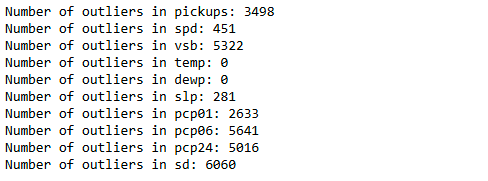

In [35]:
# Z-score method to detect outliers
from scipy.stats import zscore

z_scores = np.abs(zscore(df[numerical_columns]))
outliers_zscore = np.where(z_scores > 3)
print(f"Outliers based on Z-score: {len(outliers_zscore[0])}")

# Checking consistency of data (example: date columns)
if 'pickup_dt' in df.columns:
    df['pickup_dt']== pd.to_datetime(df['pickup_dt'], errors='coerce')
    invalid_dates = df['pickup_dt'].isnull().sum()
    print(f"Number of invalid dates: {invalid_dates}")

Outliers based on Z-score: 3143
Number of invalid dates: 0


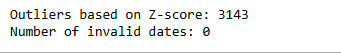


# 9- Check for Anomalies:

In [36]:

columns_with_question_mark = {}
for column in df.columns:
    count = (df[column] == '?').sum()
    if count > 0:
        columns_with_question_mark[column] = count

print("Columns with '?' and their counts:")
for column, count in columns_with_question_mark.items():
    print(f"{column}: {count}")


Columns with '?' and their counts:
hday: 2


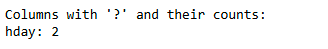

In [37]:
# Filter rows where 'hday' column has '?'
rows_with_question_mark= df[df['hday'] == '?']

print("Rows with '?' in 'hday' column:")
print(rows_with_question_mark)

Rows with '?' in 'hday' column:
          pickup_dt   borough  pickups  spd   vsb  temp  dewp     slp  pcp01  \
1     1/1/2015 1:00  Brooklyn   1519.0  5.0  10.0   NaN   7.0  1023.5    0.0   
123  1/1/2015 19:00    Queens    238.0  7.0  10.0  37.0   7.0  1016.2    0.0   

     pcp06  pcp24   sd hday  
1      0.0    0.0  0.0    ?  
123    0.0    0.0  0.0    ?  


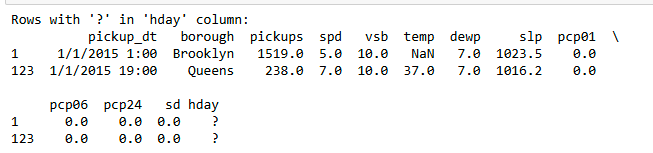

## Observations:
* We have got dtypes of pickup_dt as object that should be date-time.
* There are two rows which have "?" as the value in their hday value.
* The number of outliers is much more in our dataset.



# 10- Necessary cleaning needed

In [113]:
df.replace('?', np.nan, inplace=True)

In [39]:
df.isnull().sum()

pickup_dt       0
borough      3043
pickups         2
spd             0
vsb             0
temp          359
dewp            0
slp             0
pcp01           0
pcp06           0
pcp24           0
sd              0
hday            2
dtype: int64

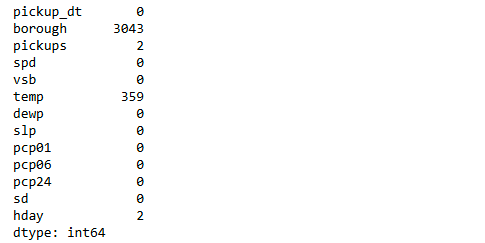

## Removing null values using mean,median and mode

In [40]:
# Filling missing values in pickups coloumn with the median of the column
df['pickups'].replace(np.nan,df['pickups'].median(),inplace=True)


In [41]:
# Filling null values in borough column with the mode of the column
df['borough'].replace(np.nan,df['borough'].mode().values[0],inplace=True)


In [42]:
# Filling missing values in temp columns with the median of the column
df['temp'].replace(np.nan,df['temp'].median(),inplace=True)


In [43]:
# Filling null values in hday column with the mode of the column
df['hday'].replace(np.nan,df['hday'].mode().values[0],inplace=True)


In [44]:
df.isnull().sum()

pickup_dt    0
borough      0
pickups      0
spd          0
vsb          0
temp         0
dewp         0
slp          0
pcp01        0
pcp06        0
pcp24        0
sd           0
hday         0
dtype: int64

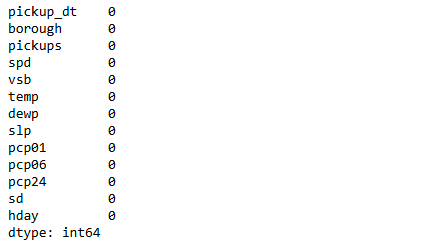

In [58]:
def cap_outliers(col):
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range    

# Cap the outliers in numerical columns
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        lr, ur = cap_outliers(df[col])
        df[col] = np.where(df[col] > ur, ur, df[col])
        df[col] = np.where(df[col] < lr, lr, df[col])

# Display the cleaned dataframe
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pickup_dt    29101 non-null  object 
 1   borough      29101 non-null  object 
 2   pickups      29101 non-null  float64
 3   spd          29101 non-null  float64
 4   vsb          29101 non-null  float64
 5   temp         29101 non-null  float64
 6   dewp         29101 non-null  float64
 7   slp          29101 non-null  float64
 8   pcp01        29101 non-null  float64
 9   pcp06        29101 non-null  float64
 10  pcp24        29101 non-null  float64
 11  sd           29101 non-null  float64
 12  hday         29101 non-null  object 
 13  hour         29101 non-null  float64
 14  day_of_week  29101 non-null  object 
dtypes: float64(11), object(4)
memory usage: 3.3+ MB
None
            pickups           spd           vsb          temp          dewp  \
count  29101.000000  29101.000000  29101

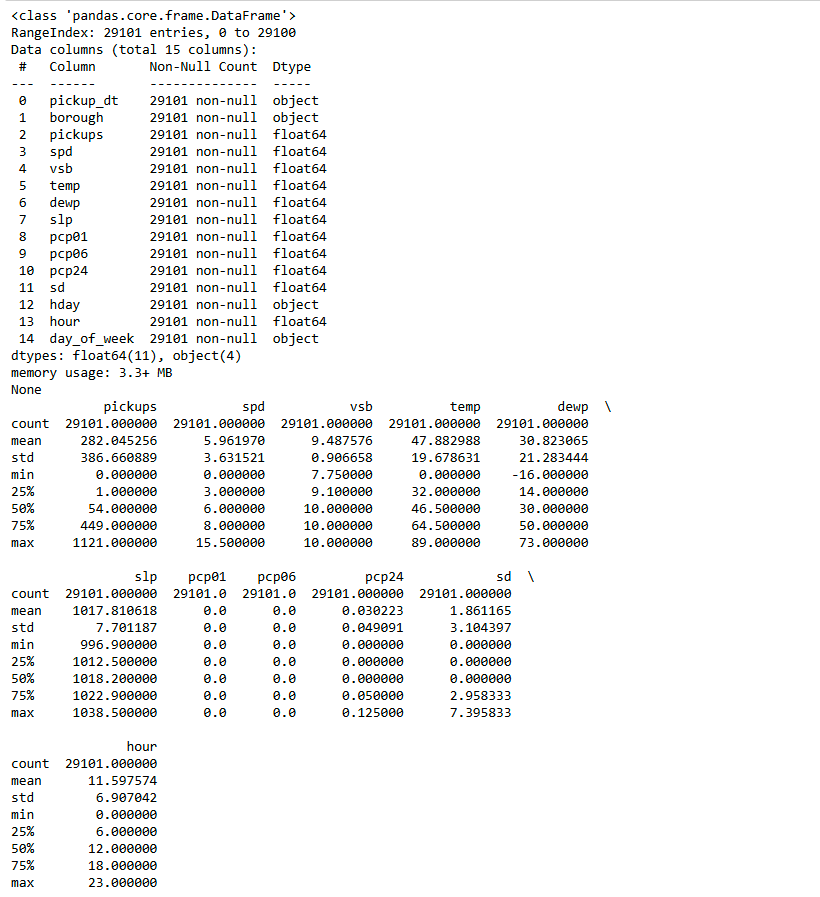

## Observations:
* No null values in the dataset.
* Now there is no outliers in our data.
* Since we have done most of the necessary cleaning of our data, now we will perform EDA on it. 

# 1- Pickup Analysis

In [59]:
# 1. Total number of Uber pickups across all boroughs
total_pickups = df['pickups'].sum()
total_pickups


8207799.0

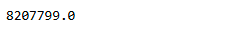

Borough with highest average hourly pickups: Manhattan (1002.285056412618 pickups/hour)


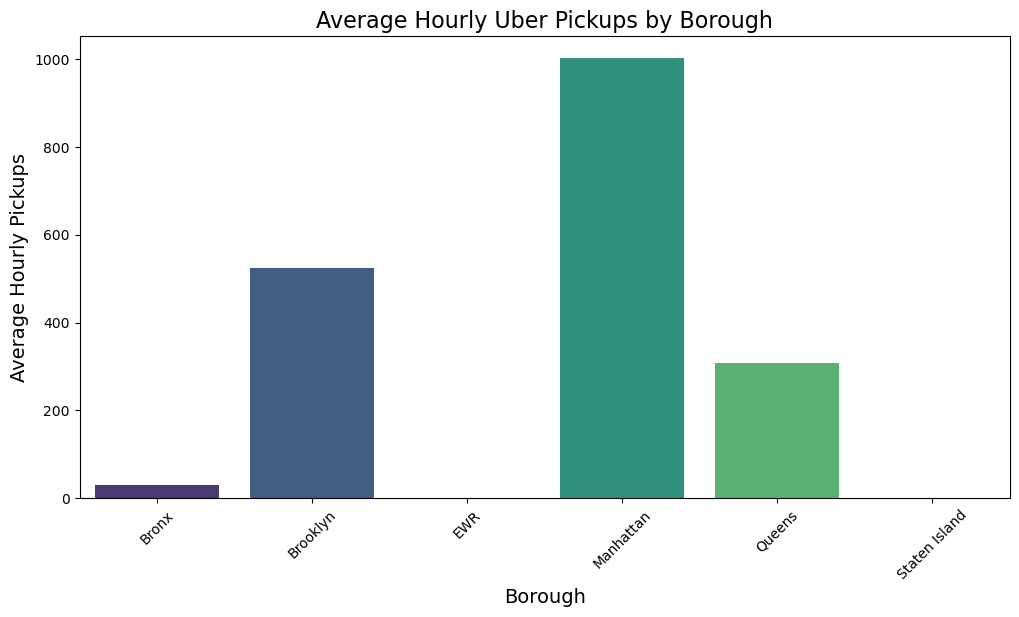

In [60]:
avg_hourly_pickups = df.groupby('borough')['pickups'].mean()
highest_avg_borough = avg_hourly_pickups.idxmax()
highest_avg_pickups = avg_hourly_pickups.max()


print(f"Borough with highest average hourly pickups: {highest_avg_borough} ({highest_avg_pickups} pickups/hour)")

# Plotting the data
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_hourly_pickups.index, y=avg_hourly_pickups.values, palette='viridis')


plt.title('Average Hourly Uber Pickups by Borough', fontsize=16)
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Average Hourly Pickups', fontsize=14)
plt.xticks(rotation=45)

# Display the plot
plt.show()

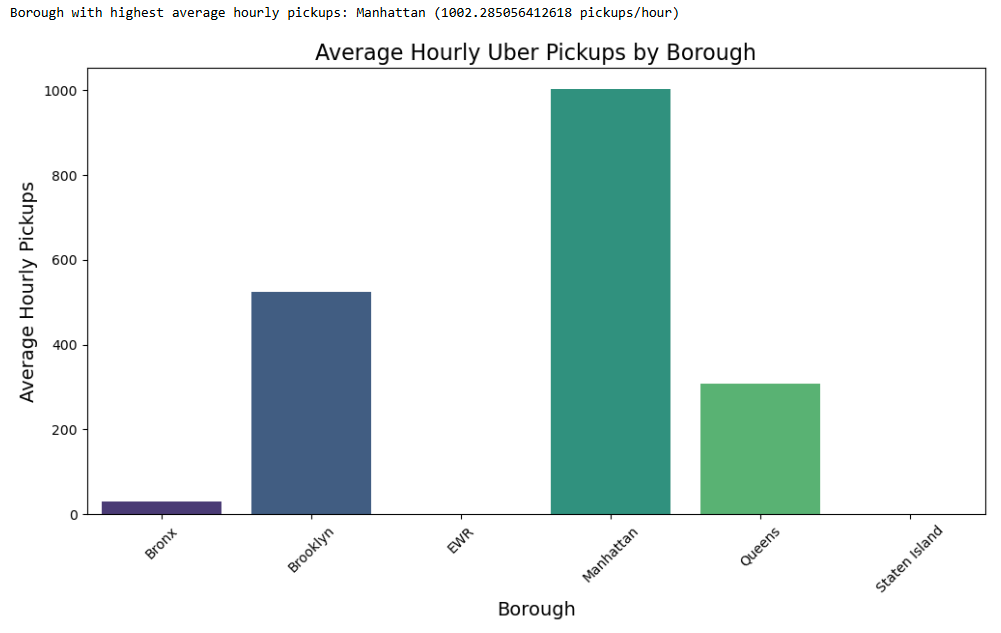

Number of pickups by hour of the day:
    hour     pickups
0      0  333.861411
1      1  276.578638
2      2  205.149573
3      3  153.505181
4      4  138.691581
5      5  148.648718
6      6  192.377500
7      7  237.443994
8      8  275.824247
9      9  292.635922
10    10  292.722449
11    11  291.485950
12    12  287.656250
13    13  284.920816
14    14  292.911184
15    15  304.999182
16    16  310.843393
17    17  315.169381
18    18  336.570728
19    19  346.274128
20    20  351.917275
21    21  353.895935
22    22  359.273242
23    23  359.614064


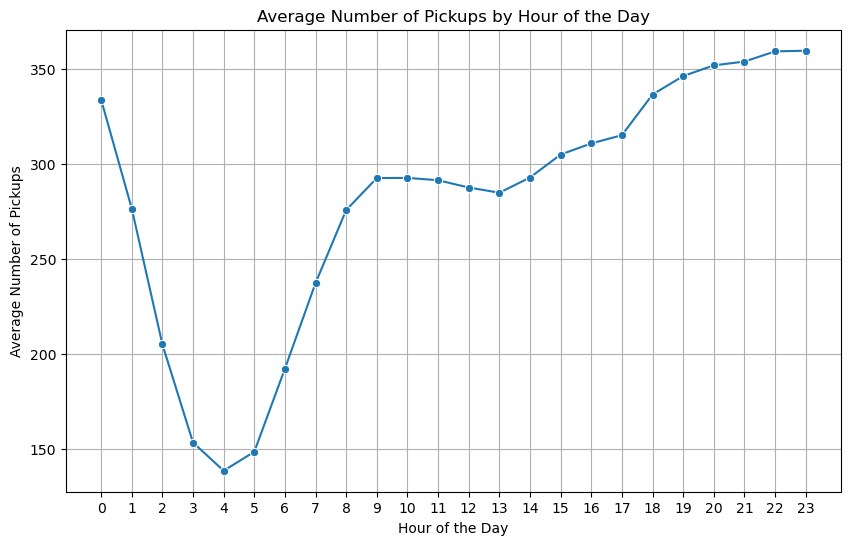

In [61]:
# Converting pickup_dt to datetime
df['pickup_dt'] = pd.to_datetime(df['pickup_dt'], format='mixed', dayfirst=True)


# Adding a column for the hour of the day
df['hour'] = df['pickup_dt'].dt.hour

# Adding a column for the day of the week
df['day_of_week'] = df['pickup_dt'].dt.day_name()

# Number of pickups by hour of the day
hourly_pickups = df.groupby('hour')['pickups'].mean().reset_index()

print(f"Number of pickups by hour of the day:\n{hourly_pickups}")


plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='pickups', data=hourly_pickups, marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Pickups')
plt.title('Average Number of Pickups by Hour of the Day')
plt.xticks(range(24))  # Ensure all hours are shown on the x-axis
plt.grid(True)
plt.show()


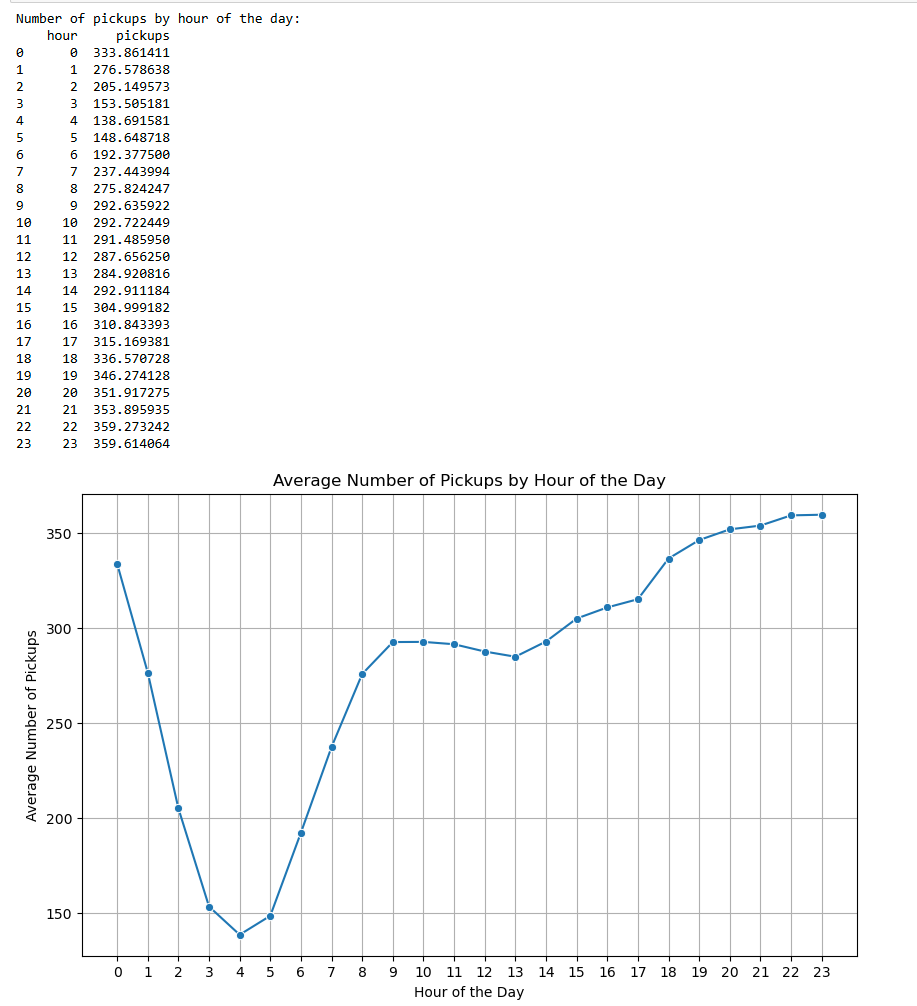

Day of the week with the highest number of pickups:
day_of_week      Saturday
pickups        321.458106
Name: 2, dtype: object


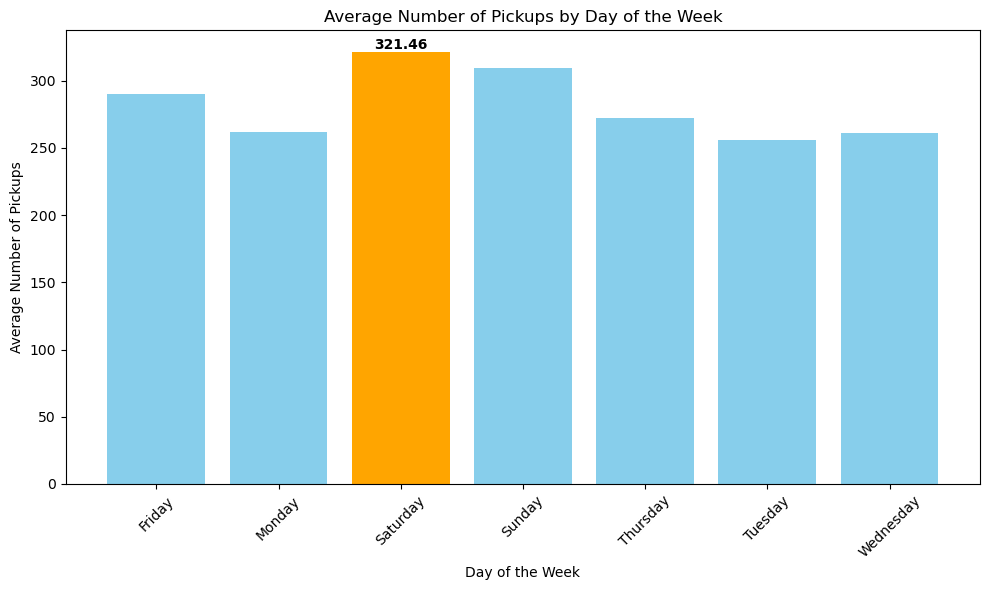

In [122]:
# Day of the week with the highest number of pickups
day_of_week_pickups = df.groupby('day_of_week')['pickups'].mean().reset_index()
day_with_highest_pickups = day_of_week_pickups.loc[day_of_week_pickups['pickups'].idxmax()]

print(f"Day of the week with the highest number of pickups:\n{day_with_highest_pickups}")


# Plotting
plt.figure(figsize=(10, 6))
plt.bar(day_of_week_pickups['day_of_week'], day_of_week_pickups['pickups'], color='skyblue')

# Adding titles and labels
plt.title('Average Number of Pickups by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Pickups')
plt.xticks(rotation=45)  # Rotating the x labels for better readability

# Highlighting the day with the highest number of pickups
max_pickups_day = day_with_highest_pickups['day_of_week']
max_pickups_value = day_with_highest_pickups['pickups']
plt.bar(max_pickups_day, max_pickups_value, color='orange')

# Adding a text annotation for the highest day
plt.text(max_pickups_day, max_pickups_value, f'{max_pickups_value:.2f}', ha='center', va='bottom', fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()

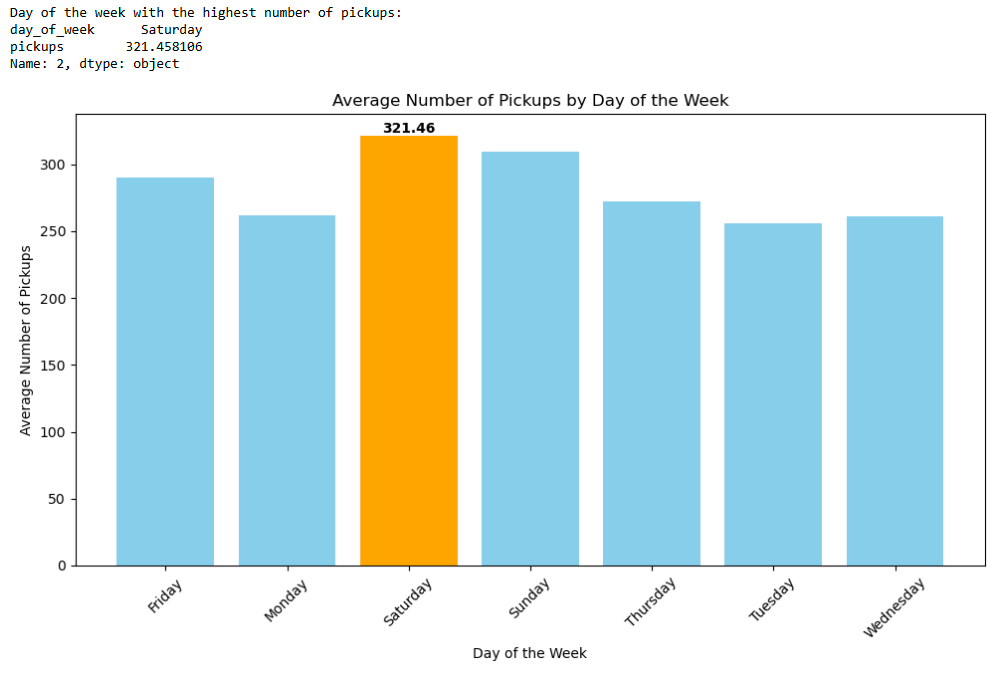

# 2- Weather Impact

In [64]:
#Correlation between temperature and the number of pickups
temp_pickup_corr = df['temp'].corr(df['pickups'])

print(f"The correlation between temperature and the number of pickups:\n{temp_pickup_corr}")


The correlation between temperature and the number of pickups:
0.06813480303893318


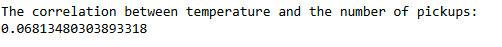

In [68]:
# Correlation between visibility and the number of pickups
vsb_pickup_corr = df['vsb'].corr(df['pickups'])

print(f"The Correlation between visibility and the number of pickups:\n{vsb_pickup_corr}")




The Correlation between visibility and the number of pickups:
-0.0028513311640650245


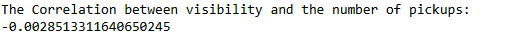

In [116]:
# Correlation between 1-hour precipitation and the number of pickups
pcp01_pickup_corr = df['pcp01'].corr(df['pickups'])

# Correlation between 6-hour precipitation and the number of pickups
pcp06_pickup_corr = df['pcp06'].corr(df['pickups'])

# Correlation between 24-hour precipitation and the number of pickups
pcp24_pickup_corr = df['pcp24'].corr(df['pickups'])

print(f"The Correlation between 1-hour precipitation and the number of pickups:\n{pcp01_pickup_corr}\n")
print(f"The Correlation between 6-hour precipitation and the number of pickups:\n{pcp06_pickup_corr}\n")
print(f"The Correlation between 24-hour precipitation and the number of pickups:\n{pcp24_pickup_corr}\n")


The Correlation between 1-hour precipitation and the number of pickups:
nan

The Correlation between 6-hour precipitation and the number of pickups:
nan

The Correlation between 24-hour precipitation and the number of pickups:
-0.016615510422116304



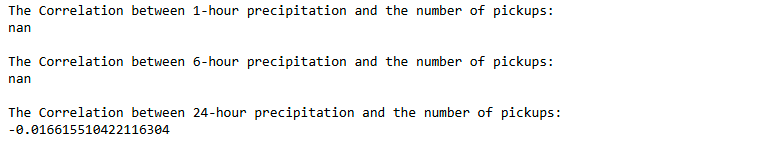

In [118]:
# Adding a column for the season
def get_season(date):
    if date.month in [12, 1, 2]:
        return 'Winter'
    elif date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['pickup_dt'].apply(get_season)

# Column for the hour of the day
df['hour'] = df['pickup_dt'].dt.hour

KeyError: 'pickup_dt'

Number of pickups by season:
season
Spring    286.576588
Summer    316.945295
Winter    256.686016
Name: pickups, dtype: float64


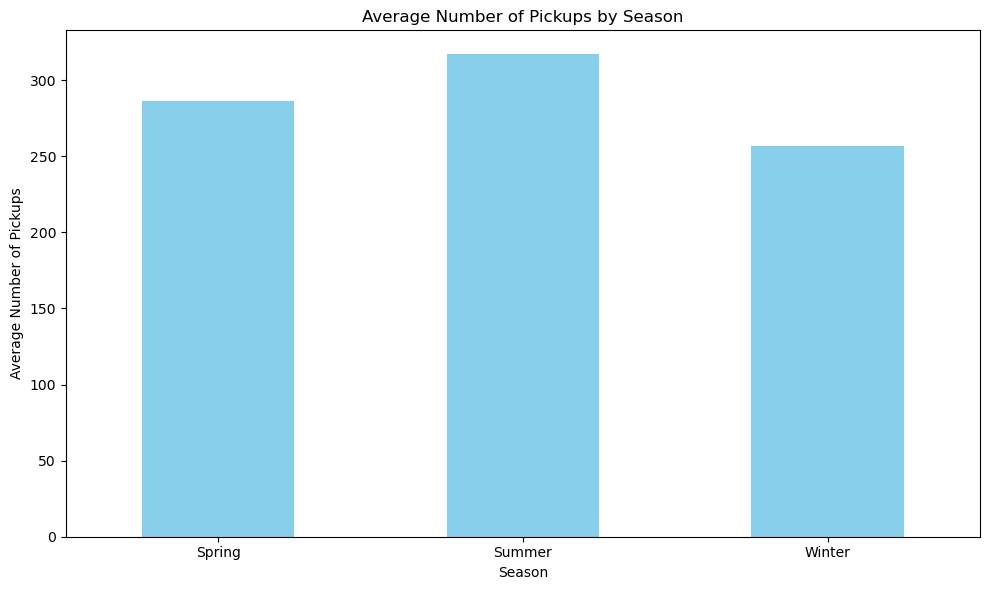

In [73]:
# Number of pickups by season
season_pickups = df.groupby('season')['pickups'].mean()

print(f"Number of pickups by season:\n{season_pickups}")

# Plotting
plt.figure(figsize=(10, 6))
season_pickups.plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Average Number of Pickups by Season')
plt.xlabel('Season')
plt.ylabel('Average Number of Pickups')

# Display the plot
plt.xticks(rotation=0)  # Rotate x ticks if needed for better readability
plt.tight_layout()
plt.show()

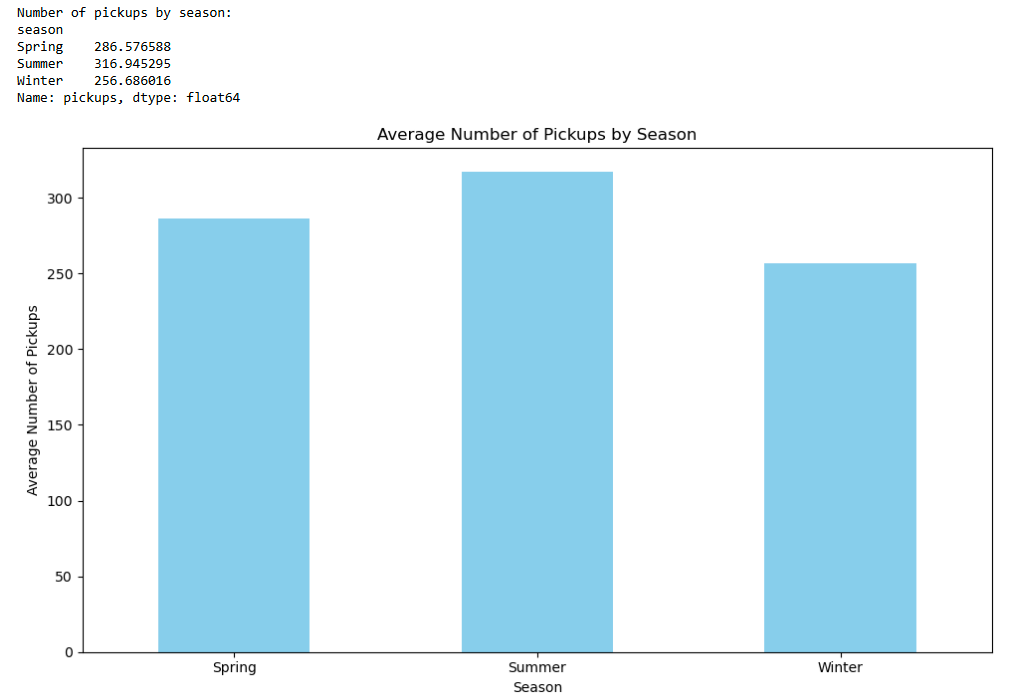

Average number of pickups during holidays vs non-holidays:
is_holiday
False    282.180652
True     278.659517
Name: pickups, dtype: float64


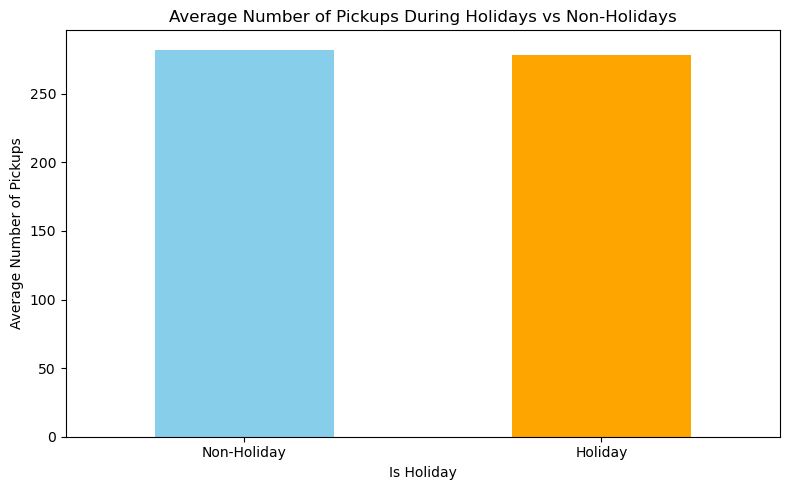

In [75]:
# Average number of pickups during holidays vs non-holidays
df['is_holiday'] = df['hday'] == 'Y'
holiday_pickups = df.groupby('is_holiday')['pickups'].mean()

print(f"Average number of pickups during holidays vs non-holidays:\n{holiday_pickups}")


# Plotting
plt.figure(figsize=(8, 5))
holiday_pickups.plot(kind='bar', color=['skyblue', 'orange'])

# Adding titles and labels
plt.title('Average Number of Pickups During Holidays vs Non-Holidays')
plt.xlabel('Is Holiday')
plt.ylabel('Average Number of Pickups')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], rotation=0)

# Display the plot
plt.tight_layout()
plt.show()

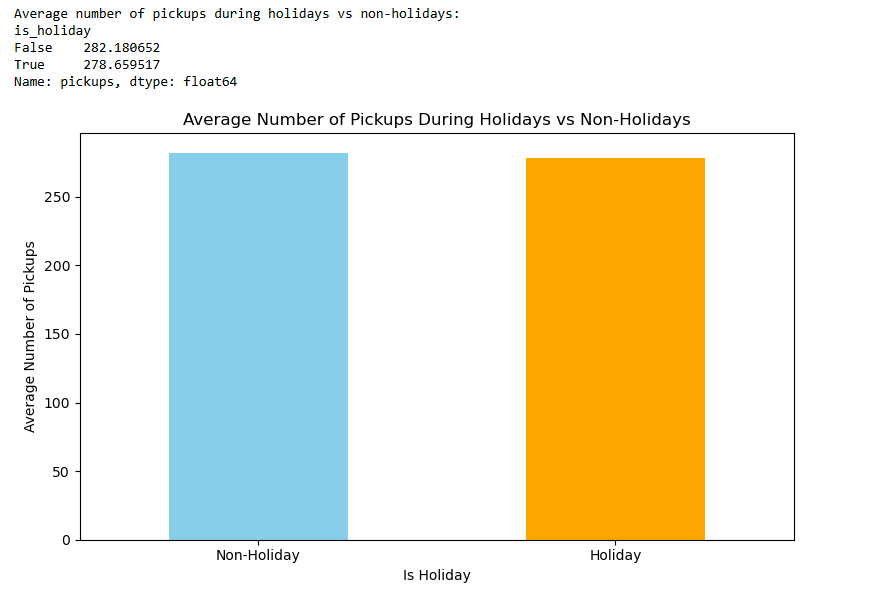

In [76]:
# Correlation between snow depth and number of pickups
snow_depth_corr = df['sd'].corr(df['pickups'])

print(f"The correlation between snow depth and number of pickups:\n{snow_depth_corr}")

The correlation between snow depth and number of pickups:
-0.025359545201926337


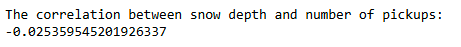

# 4- Hourly Trends

Peak hours for Uber pickups in each borough:
           borough  hour      pickups
18           Bronx    18    40.496855
46        Brooklyn    22   785.226519
63             EWR    15     0.066298
89       Manhattan    17  1121.000000
118         Queens    22   477.403315
138  Staten Island    18     2.403315


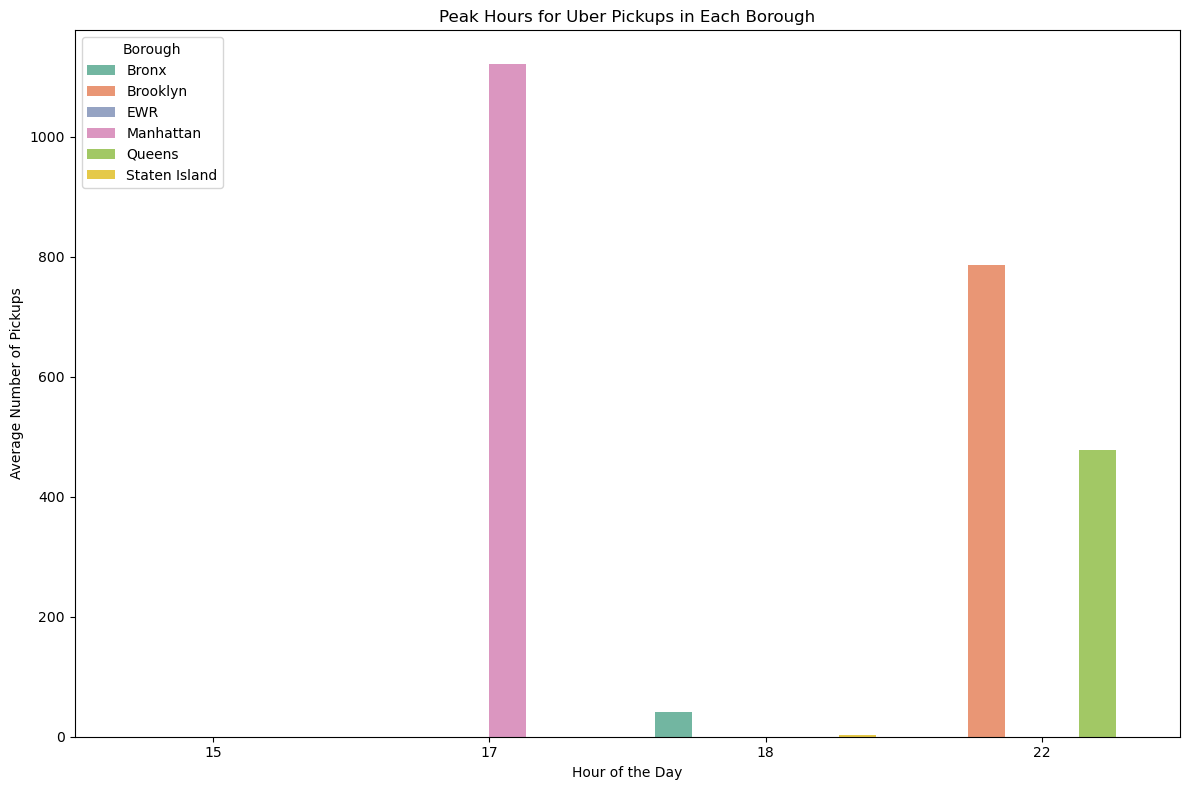

In [81]:
# Peak hours for Uber pickups in each borough
peak_hours_borough = df.groupby(['borough', 'hour'])['pickups'].mean().reset_index()
peak_hours_borough = peak_hours_borough.loc[peak_hours_borough.groupby('borough')['pickups'].idxmax()]

print(f"Peak hours for Uber pickups in each borough:\n{peak_hours_borough}")


plt.figure(figsize=(12, 8))

# Use seaborn to create grouped bar plot
sns.barplot(x='hour', y='pickups', hue='borough', data=peak_hours_borough, palette='Set2')

# Adding titles and labels
plt.title('Peak Hours for Uber Pickups in Each Borough')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Pickups')
plt.legend(title='Borough', loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

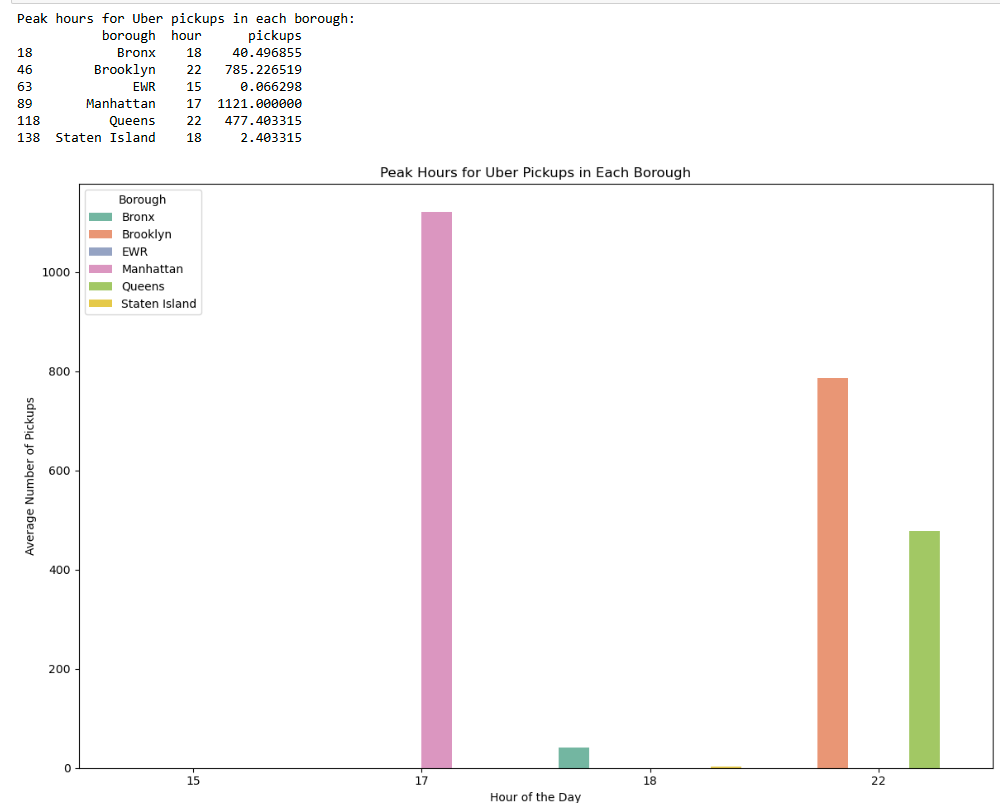

In [ ]:
# Number of pickups during rush hours (7-9 AM, 5-7 PM)
df['is_rush_hour'] = df['hour'].isin([7, 8, 9, 17, 18, 19])
rush_hour_pickups = df.groupby('is_rush_hour')['pickups'].mean()

print(f"Number of pickups during rush hours (7-9 AM, 5-7 PM):\n{rush_hour_pickups}")

# Plotting
plt.figure(figsize=(8, 5))
rush_hour_pickups.plot(kind='bar', color=['skyblue', 'orange'])

# Adding titles and labels
plt.title('Number of Pickups During Rush Hours vs Non-Rush Hours')
plt.xlabel('Is Rush Hour')
plt.ylabel('Average Number of Pickups')
plt.xticks([0, 1], ['Non-Rush Hour', 'Rush Hour'], rotation=0)

# Adding annotations on top of bars
for i, v in enumerate(rush_hour_pickups):
    plt.text(i, v + 0.1, f"{v:.2f}", ha='center', va='bottom', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


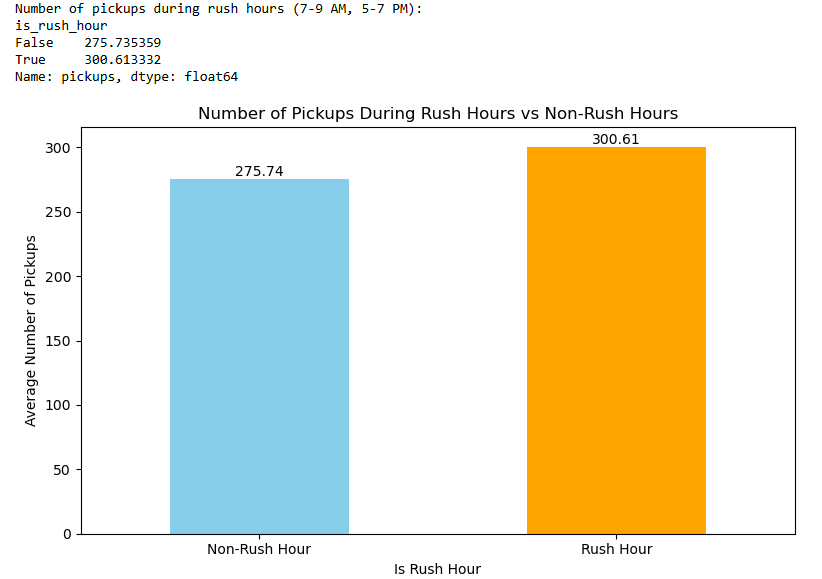

Average number of pickups during late-night hours (12 AM - 4 AM):
is_late_night
False    297.110618
True     222.625892
Name: pickups, dtype: float64


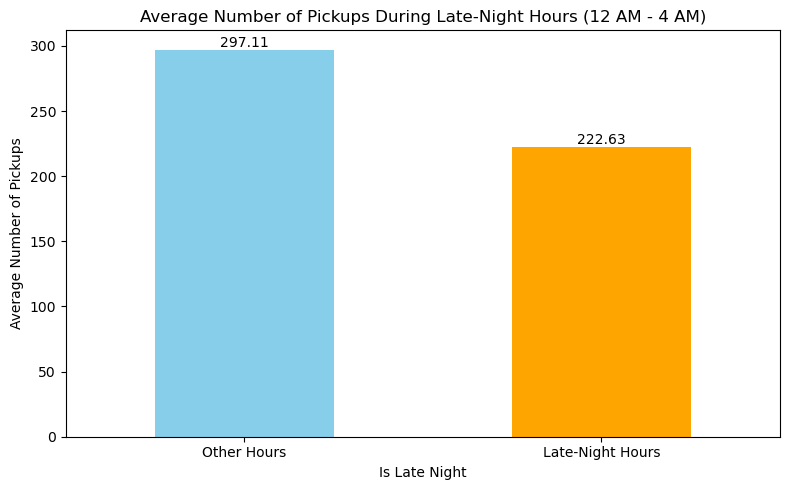

In [83]:
# Average number of pickups during late-night hours (12 AM - 4 AM)
df['is_late_night'] = df['hour'].isin([0, 1, 2, 3, 4])
late_night_pickups = df.groupby('is_late_night')['pickups'].mean()
print(f"Average number of pickups during late-night hours (12 AM - 4 AM):\n{late_night_pickups}")

# Plotting
plt.figure(figsize=(8, 5))
late_night_pickups.plot(kind='bar', color=['skyblue', 'orange'])

# Adding titles and labels
plt.title('Average Number of Pickups During Late-Night Hours (12 AM - 4 AM)')
plt.xlabel('Is Late Night')
plt.ylabel('Average Number of Pickups')
plt.xticks([0, 1], ['Other Hours', 'Late-Night Hours'], rotation=0)

# Adding annotations on top of bars
for i, v in enumerate(late_night_pickups):
    plt.text(i, v + 0.1, f"{v:.2f}", ha='center', va='bottom', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

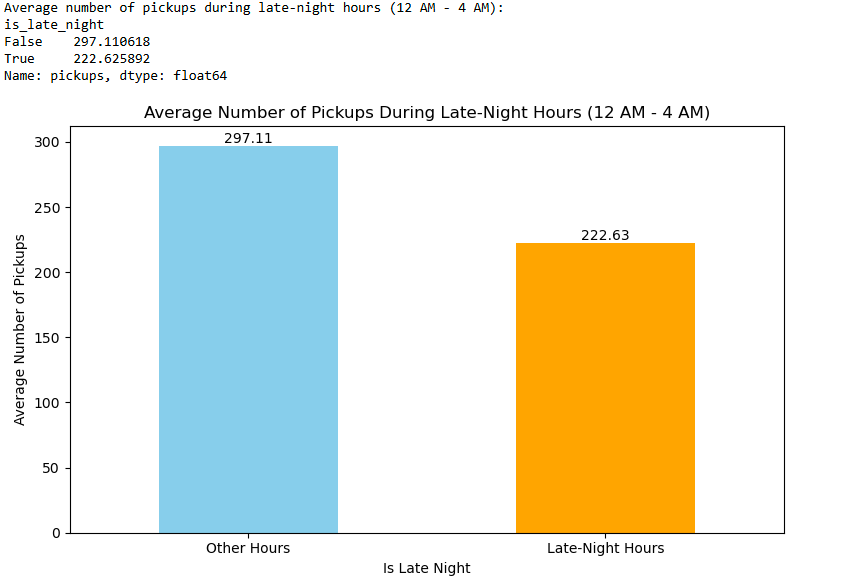

# 5- Borough Comparison

In [ ]:
# Adding a column for weekends
df['is_weekend'] = df['pickup_dt'].dt.dayofweek >= 5

Borough comparison during different weather conditions:
             borough  temp    vsb   spd  pcp01  pcp06  pcp24        sd  \
0              Bronx   2.0  10.00   7.0    0.0    0.0  0.090  7.395833   
1              Bronx   2.0  10.00   8.0    0.0    0.0  0.090  7.395833   
2              Bronx   2.0  10.00  13.0    0.0    0.0  0.090  7.395833   
3              Bronx   3.0  10.00  11.0    0.0    0.0  0.090  7.395833   
4              Bronx   3.0  10.00  14.0    0.0    0.0  0.090  7.395833   
...              ...   ...    ...   ...    ...    ...    ...       ...   
17783  Staten Island  88.0   9.10   8.0    0.0    0.0  0.000  0.000000   
17784  Staten Island  88.0  10.00   7.0    0.0    0.0  0.000  0.000000   
17785  Staten Island  89.0   7.75   3.0    0.0    0.0  0.125  0.000000   
17786  Staten Island  89.0   7.75   5.0    0.0    0.0  0.125  0.000000   
17787  Staten Island  89.0   9.10   7.0    0.0    0.0  0.000  0.000000   

       pickups  
0         22.0  
1         20.5  
2   

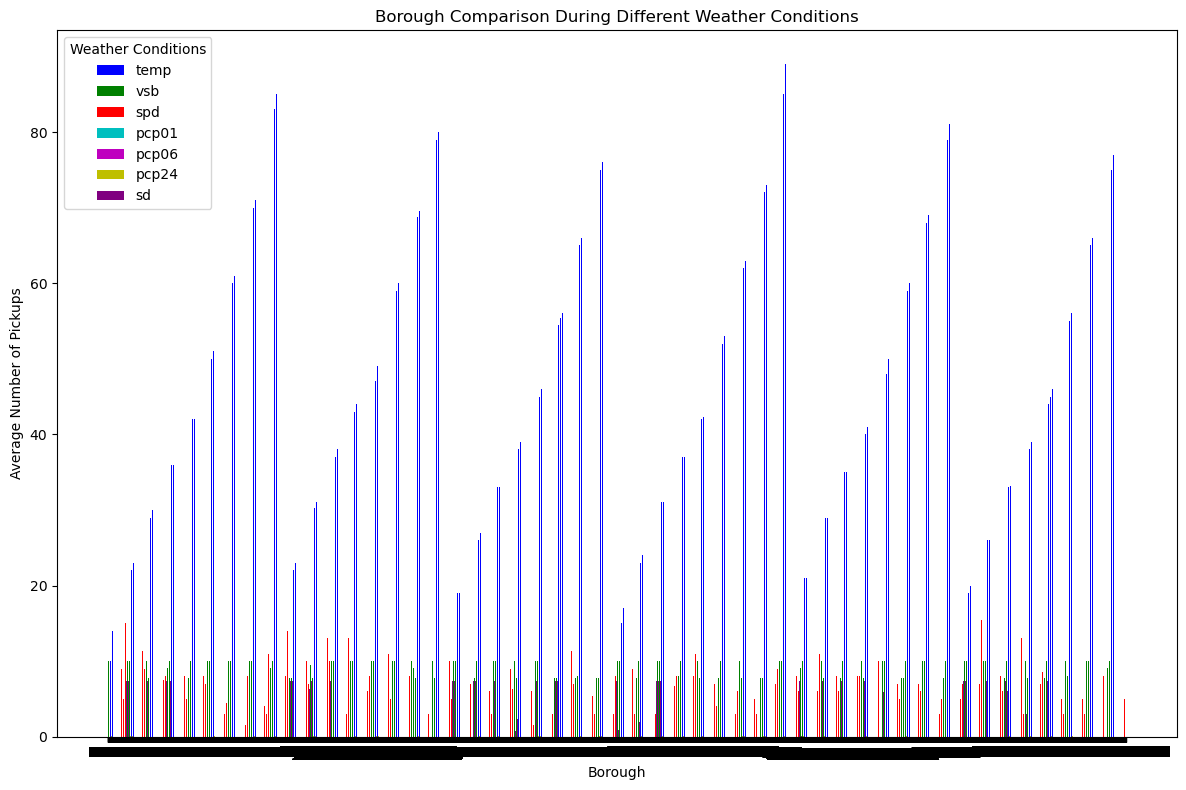

In [87]:
# Borough comparison during different weather conditions
weather_conditions = ['temp', 'vsb', 'spd', 'pcp01', 'pcp06', 'pcp24', 'sd']
borough_weather_pickups = df.groupby(['borough'] + weather_conditions)['pickups'].mean().reset_index()

print(f"Borough comparison during different weather conditions:\n{borough_weather_pickups}")


# Plotting
plt.figure(figsize=(12, 8))

# Set up colors for each weather condition
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'purple']

# Iterate over each weather condition to create grouped bars
for i, condition in enumerate(weather_conditions):
    plt.bar(np.arange(len(borough_weather_pickups['borough'])) + i * 0.1, borough_weather_pickups[condition], 
            width=0.1, label=condition, color=colors[i])

# Adding labels and titles
plt.xlabel('Borough')
plt.ylabel('Average Number of Pickups')
plt.title('Borough Comparison During Different Weather Conditions')
plt.xticks(np.arange(len(borough_weather_pickups['borough'])), borough_weather_pickups['borough'])
plt.legend(title='Weather Conditions')

# Display the plot
plt.tight_layout()
plt.show()

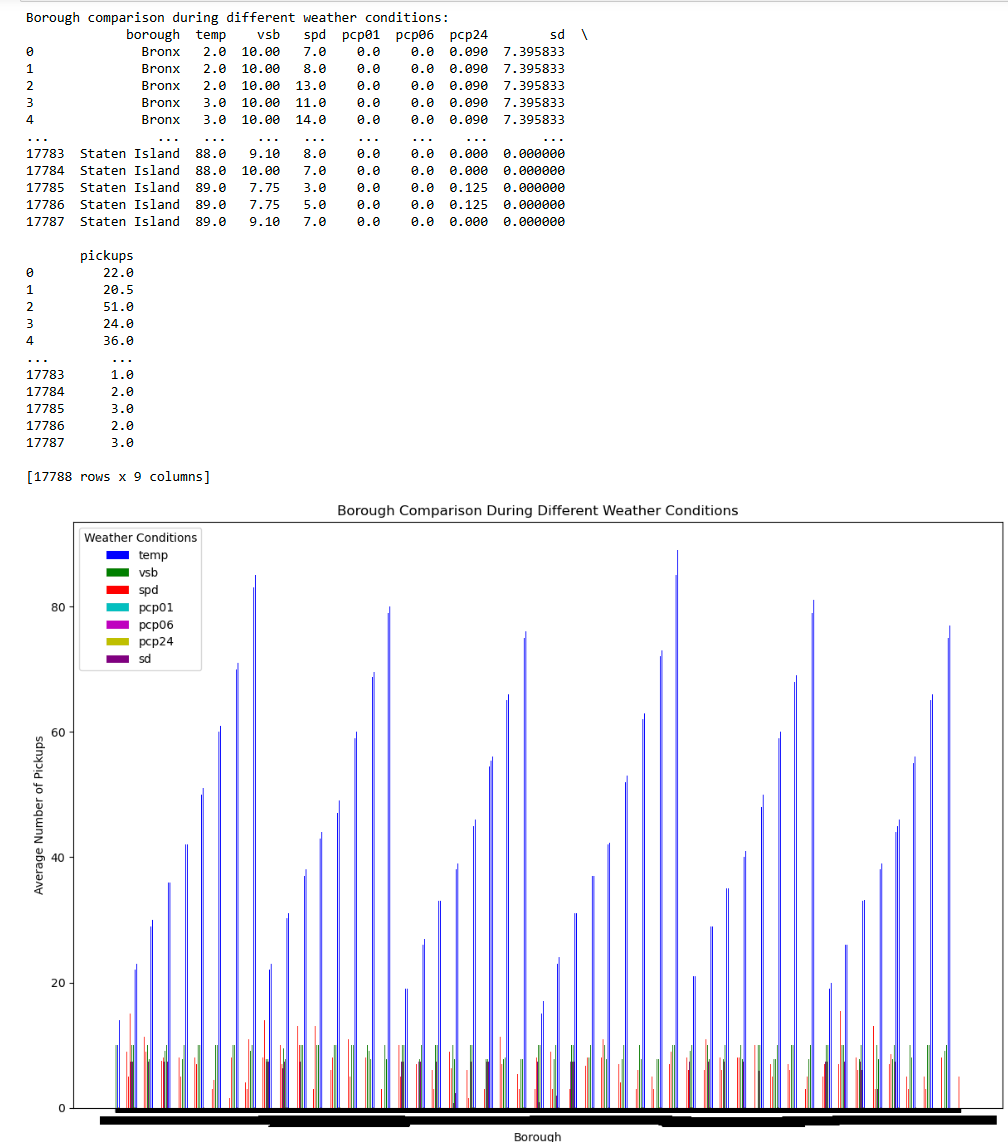

Borough with the highest increase in pickups during holidays:
          borough  is_holiday      pickups
0           Bronx       False    30.709296
2        Brooklyn       False   525.110127
5             EWR        True     0.041916
6       Manhattan       False  1002.765565
9          Queens        True   319.945783
10  Staten Island       False     1.606082


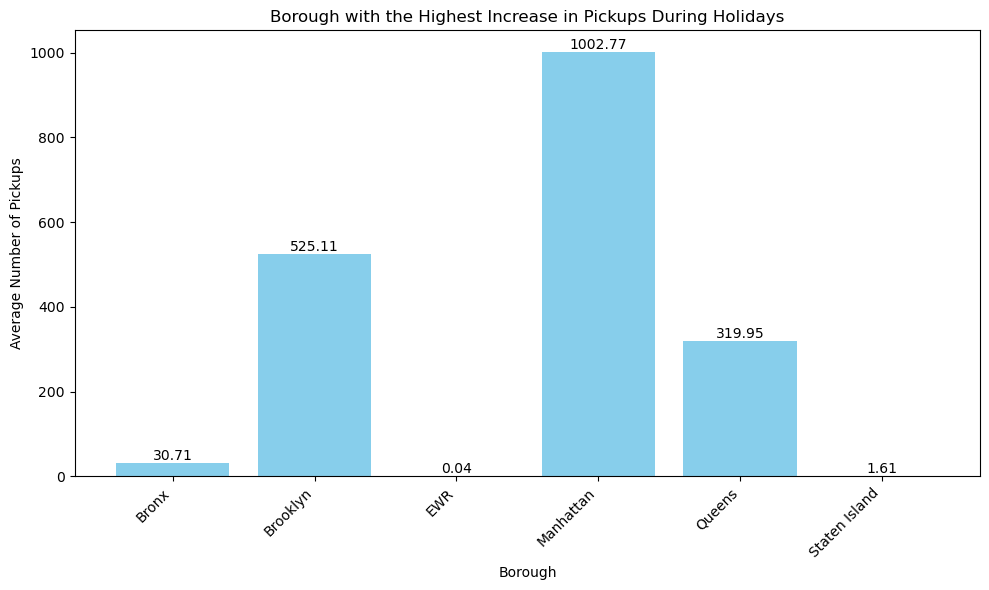

In [88]:
# Borough with the highest increase in pickups during holidays
df['is_holiday'] = df['hday'] == 'Y'
holiday_increase_borough = df.groupby(['borough', 'is_holiday'])['pickups'].mean().reset_index()
holiday_increase_borough = holiday_increase_borough.loc[holiday_increase_borough.groupby('borough')['pickups'].idxmax()]

print(f"Borough with the highest increase in pickups during holidays:\n{holiday_increase_borough}")

# Plotting
plt.figure(figsize=(10, 6))

# Create bar plot
plt.bar(holiday_increase_borough['borough'], holiday_increase_borough['pickups'], color='skyblue')

# Adding labels and title
plt.xlabel('Borough')
plt.ylabel('Average Number of Pickups')
plt.title('Borough with the Highest Increase in Pickups During Holidays')

# Adding values on top of bars
for i, v in enumerate(holiday_increase_borough['pickups']):
    plt.text(i, v + 0.1, f"{v:.2f}", ha='center', va='bottom', fontsize=10)

# Display the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

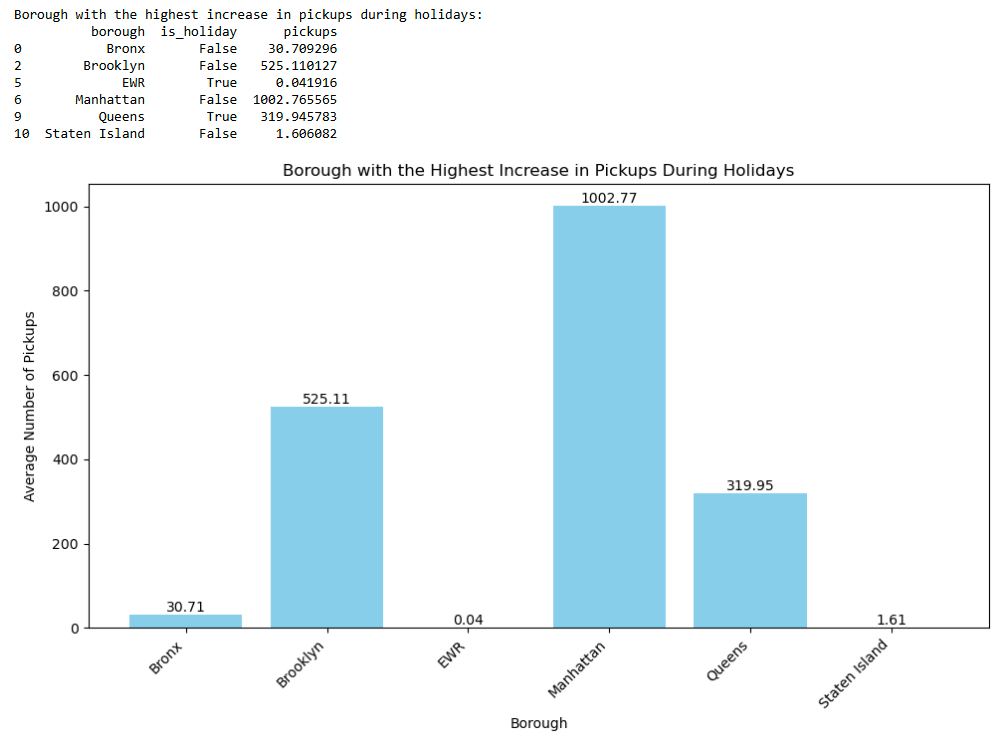

Number of pickups on weekdays vs weekends for each borough:
          borough  is_weekend      pickups
0           Bronx       False    28.336533
1           Bronx        True    36.117593
2        Brooklyn       False   457.220032
3        Brooklyn        True   691.641827
4             EWR       False     0.027141
5             EWR        True     0.016827
6       Manhattan       False   990.815509
7       Manhattan        True  1030.729167
8          Queens       False   297.083683
9          Queens        True   339.616186
10  Staten Island       False     1.471729
11  Staten Island        True     1.924679


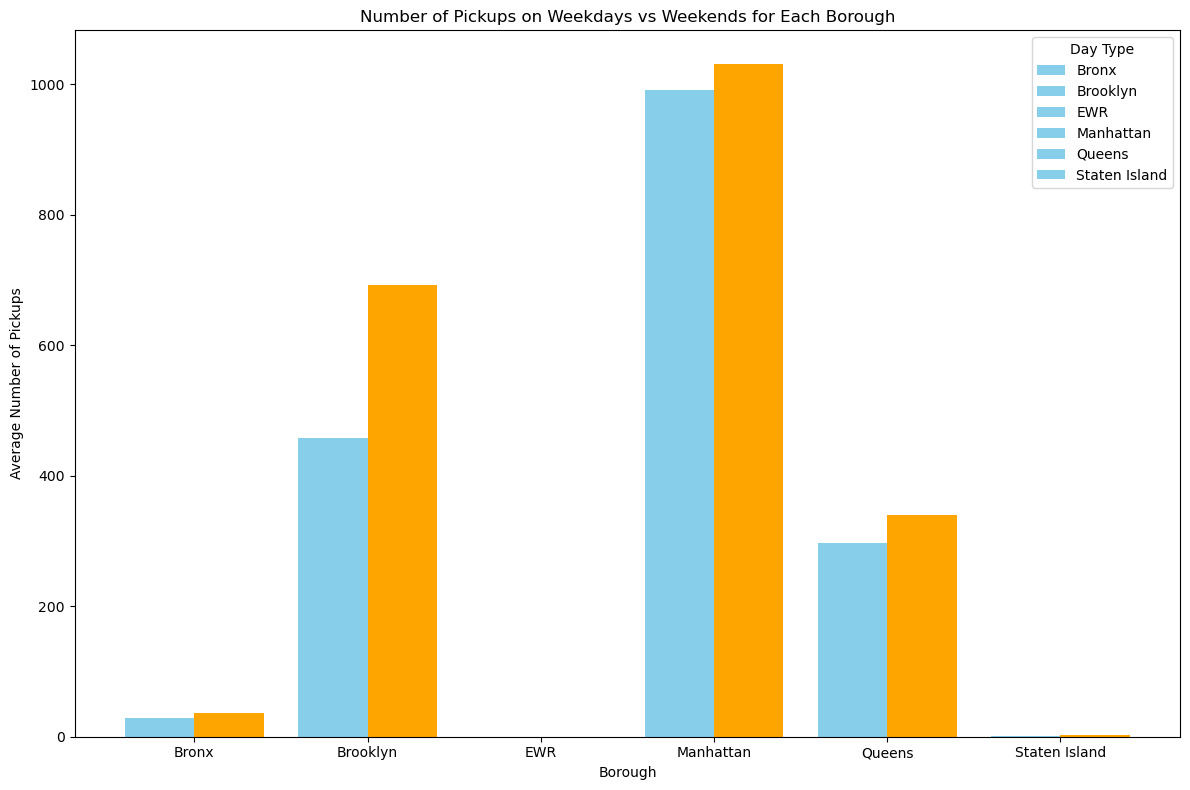

In [92]:
# Number of pickups on weekdays vs weekends for each borough
weekday_weekend_pickups = df.groupby(['borough', 'is_weekend'])['pickups'].mean().reset_index()

print(f"Number of pickups on weekdays vs weekends for each borough:\n{weekday_weekend_pickups}")

# Plotting
plt.figure(figsize=(12, 8))

# Set up colors for weekdays and weekends
colors = {False: 'skyblue', True: 'orange'}  # Adjusted to match boolean values

# Iterate over each borough to create grouped bars
for i, borough in enumerate(weekday_weekend_pickups['borough'].unique()):
    data = weekday_weekend_pickups[weekday_weekend_pickups['borough'] == borough]
    plt.bar([i - 0.2, i + 0.2], data['pickups'], width=0.4, label=borough, color=[colors[day] for day in data['is_weekend']])

# Adding labels and title
plt.xlabel('Borough')
plt.ylabel('Average Number of Pickups')
plt.title('Number of Pickups on Weekdays vs Weekends for Each Borough')

# Adding legend
plt.legend(title='Day Type', loc='upper right')

# Adjust x-axis ticks and labels
plt.xticks(range(len(weekday_weekend_pickups['borough'].unique())), weekday_weekend_pickups['borough'].unique())

# Display the plot
plt.tight_layout()
plt.show()



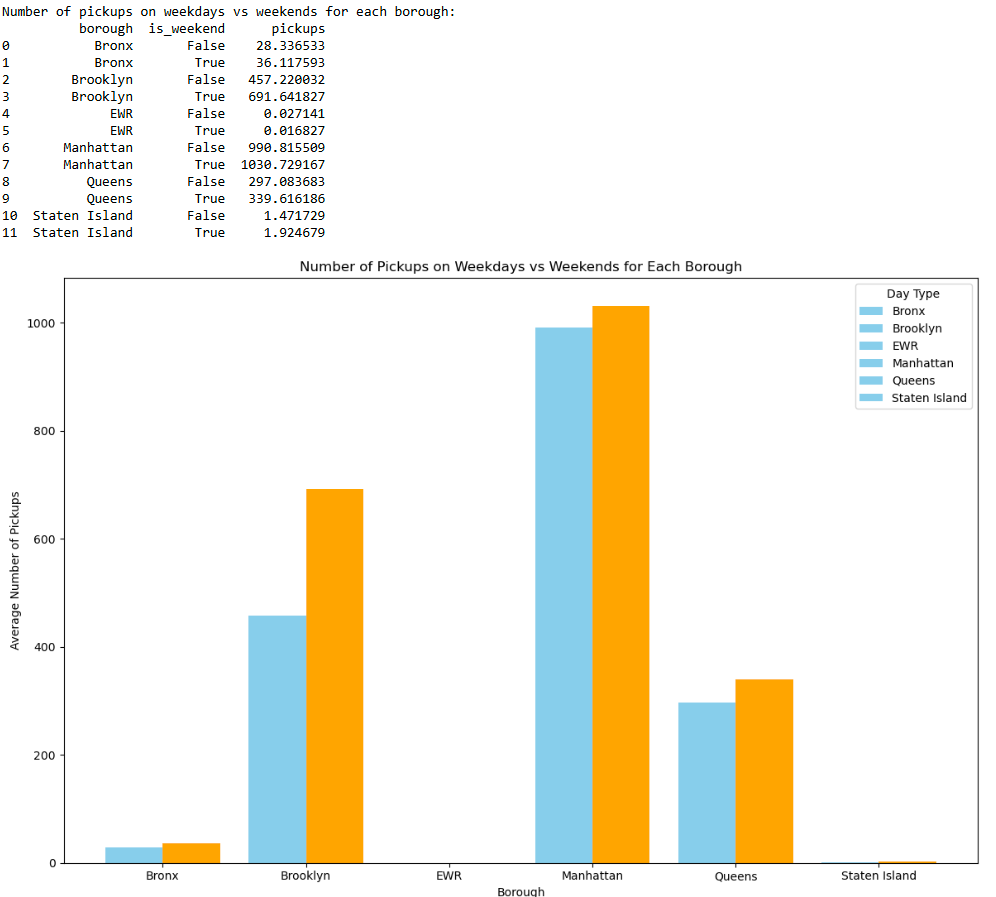

# 6- Weather Extremes

In [95]:
# Extreme weather conditions effect on pickups
extreme_weather = df[(df['temp'] > 90) | (df['temp'] < 20) | (df['pcp01'] > 1) | (df['sd'] > 2)]
extreme_weather_pickups = extreme_weather.groupby(['temp', 'pcp01', 'sd'])['pickups'].mean()

print(f"Extreme weather conditions effect on pickups:\n{extreme_weather_pickups}")


Extreme weather conditions effect on pickups:
temp  pcp01  sd      
0.0   0.0    0.000000      0.000000
2.0   0.0    7.395833    272.300000
3.0   0.0    7.395833    301.000000
4.0   0.0    7.395833    253.788235
5.0   0.0    7.395833    262.515152
                            ...    
55.0  0.0    7.041667    310.500000
56.0  0.0    7.395833    352.833333
57.0  0.0    7.250000    292.428571
58.0  0.0    7.395833    353.000000
59.0  0.0    7.395833    307.285714
Name: pickups, Length: 353, dtype: float64


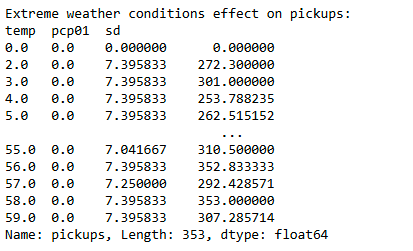

Low Visibility Pickups:
nan

Normal Visibility Pickups:
282.0452561767637



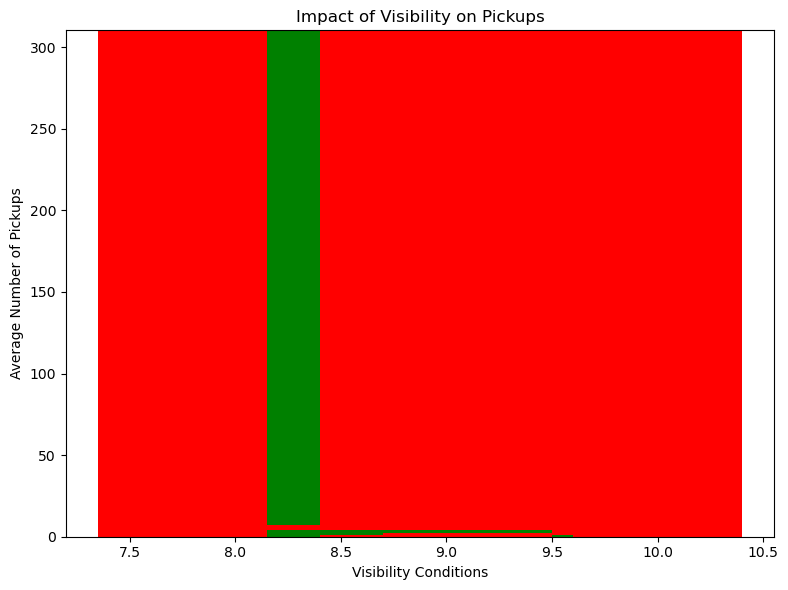

In [121]:
# Impact of visibility less than 1 mile on pickups
low_visibility = df[df['vsb'] <=1]
low_visibility_pickups = low_visibility['pickups'].mean()
normal_visibility_pickups = df[df['vsb'] > 1]['pickups'].mean()

print(f"Low Visibility Pickups:\n{low_visibility_pickups}\n")
print(f"Normal Visibility Pickups:\n{normal_visibility_pickups}\n")


# Plotting
plt.figure(figsize=(8, 6))
plt.bar(df['vsb'], df['pickups'], color=['red', 'green'])
plt.xlabel('Visibility Conditions')
plt.ylabel('Average Number of Pickups')
plt.title('Impact of Visibility on Pickups')
plt.ylim(0, max(normal_visibility_pickups, low_visibility_pickups) * 1.1)  # Set ylim to show all bars clearly
plt.tight_layout()
plt.show()

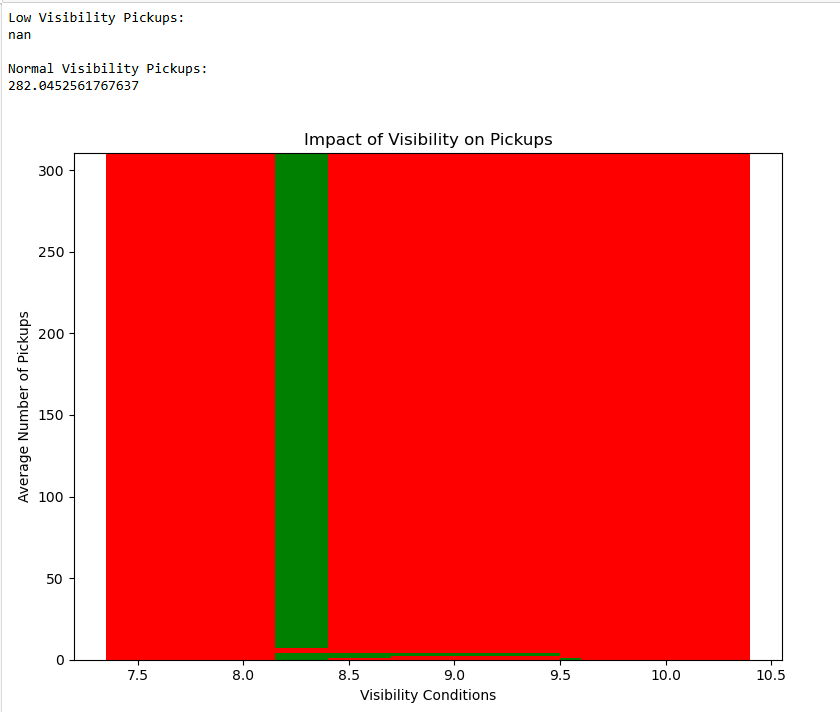

# 7- Data Correlations

In [104]:
# Correlation between sea level pressure and number of pickups
slp_pickup_corr = df['slp'].corr(df['pickups'])

print(f"The Correlation between sea level pressure and number of pickups:\n{slp_pickup_corr}")

The Correlation between sea level pressure and number of pickups:
-0.011690175691148488


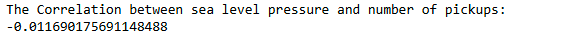

Impact of different weather variables on pickups (correlation matrix):
             temp      dewp       spd       vsb   pickups
temp     1.000000  0.890263 -0.291404 -0.050096  0.068135
dewp     0.890263  1.000000 -0.320986 -0.316896  0.047266
spd     -0.291404 -0.320986  1.000000  0.122279 -0.005233
vsb     -0.050096 -0.316896  0.122279  1.000000 -0.002851
pickups  0.068135  0.047266 -0.005233 -0.002851  1.000000


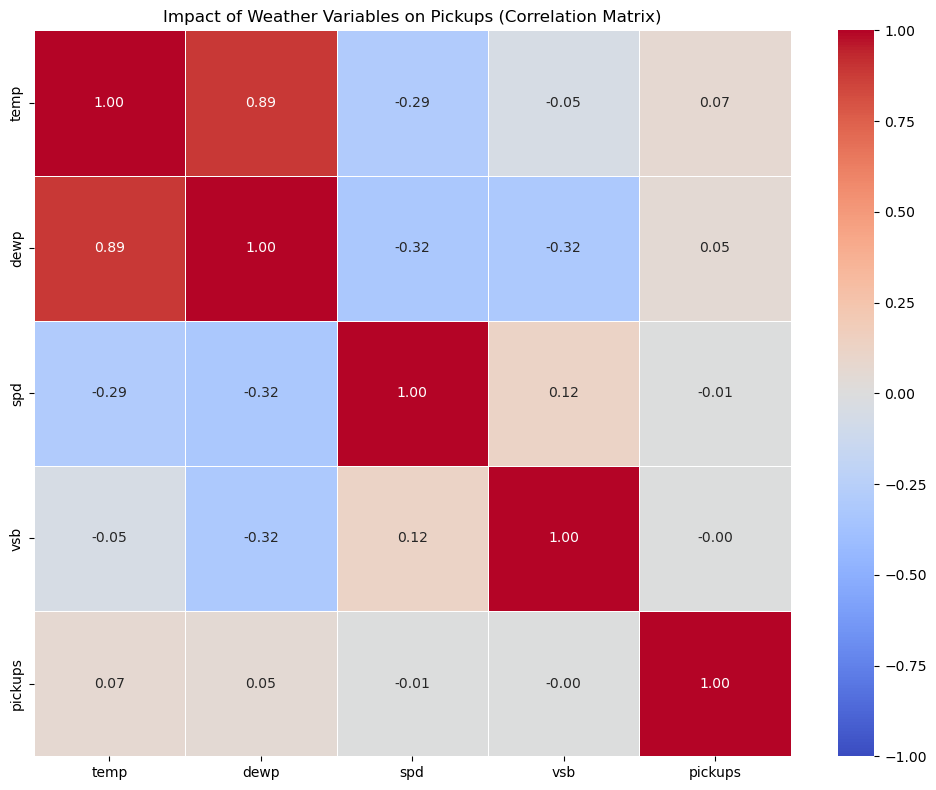

In [105]:
# Impact of different weather variables on pickups (correlation matrix)
weather_vars = df[['temp', 'dewp', 'spd', 'vsb', 'pickups']]
weather_corr_matrix = weather_vars.corr()
print(f"Impact of different weather variables on pickups (correlation matrix):\n{weather_corr_matrix}")

plt.figure(figsize=(10, 8))
sns.heatmap(weather_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", linewidths=0.5)
plt.title('Impact of Weather Variables on Pickups (Correlation Matrix)')
plt.tight_layout()
plt.show()


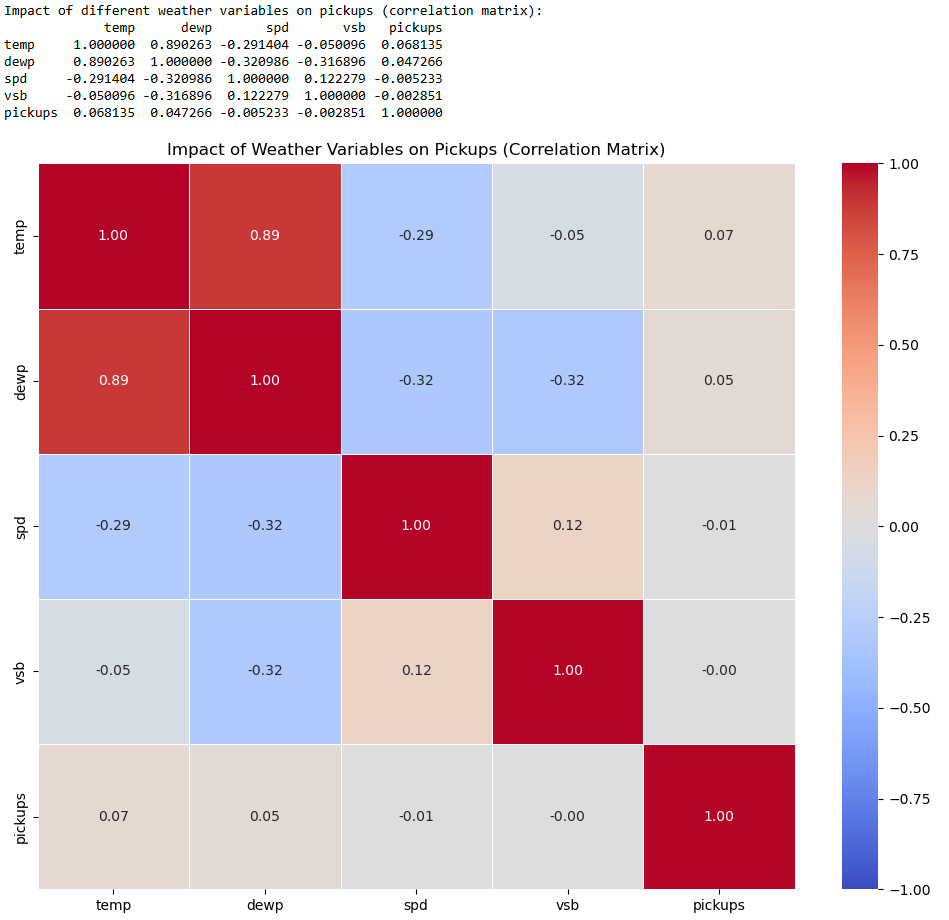


Average number of pickups on the basis of holiday status and weather conditions:

     hday  temp   vsb        spd  pcp01  pcp06  pcp24        sd     pickups
0       N   2.0  10.0   7.000000    0.0    0.0  0.090  7.395833  256.285714
1       N   2.0  10.0   8.000000    0.0    0.0  0.090  7.395833  267.714286
2       N   2.0  10.0  13.000000    0.0    0.0  0.090  7.395833  296.333333
3       N   3.0  10.0  11.000000    0.0    0.0  0.090  7.395833  289.428571
4       N   3.0  10.0  14.000000    0.0    0.0  0.090  7.395833  312.571429
...   ...   ...   ...        ...    ...    ...    ...       ...         ...
3254    Y  83.0  10.0   5.500000    0.0    0.0  0.000  0.000000  386.714286
3255    Y  84.0  10.0   4.333333    0.0    0.0  0.125  0.000000  365.857143
3256    Y  84.0  10.0   6.000000    0.0    0.0  0.125  0.000000  389.428571
3257    Y  84.0  10.0  10.000000    0.0    0.0  0.125  0.000000  392.571429
3258    Y  85.0  10.0   3.666667    0.0    0.0  0.125  0.000000  377.857143

[3259

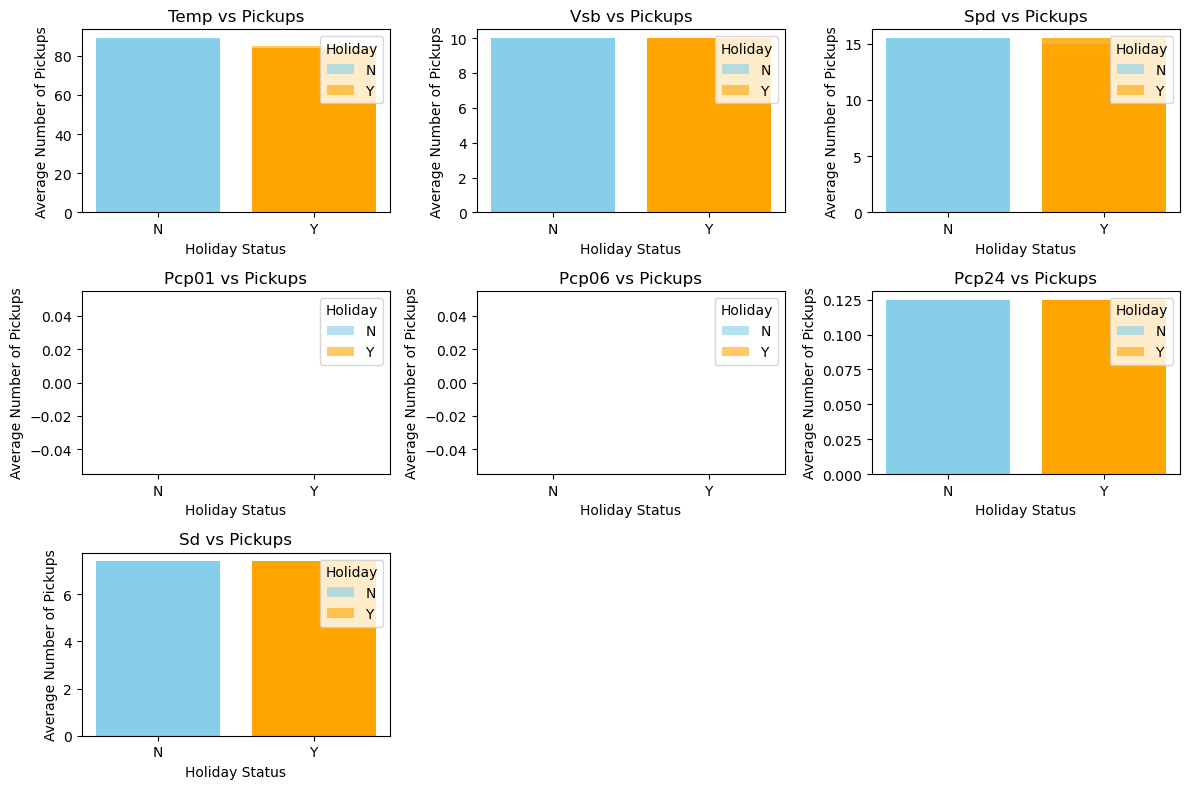

In [107]:
# Define weather conditions of interest
weather_conditions = ['temp', 'vsb', 'spd', 'pcp01', 'pcp06', 'pcp24', 'sd']

# Group by holiday status and weather conditions to find the average number of pickups
holiday_weather_pickups = df.groupby(['hday'] + weather_conditions)['pickups'].mean().reset_index()

print(f"Average number of pickups on the basis of holiday status and weather conditions:\n\n{holiday_weather_pickups}")

# Plotting
plt.figure(figsize=(12, 8))

# Set colors for holidays and non-holidays
colors = {'Y': 'orange', 'N': 'skyblue'}

# Iterate over each weather condition to create grouped bars
for i, condition in enumerate(weather_conditions):
    plt.subplot(3, 3, i + 1)
    for hday, group_data in holiday_weather_pickups.groupby('hday'):
        plt.bar(hday, group_data[condition], label=f'{hday}', color=colors[hday], alpha=0.6)

    # Adding labels and title for each subplot
    plt.title(f'{condition.capitalize()} vs Pickups')
    plt.xlabel('Holiday Status')
    plt.ylabel('Average Number of Pickups')
    plt.legend(title='Holiday', loc='upper right')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


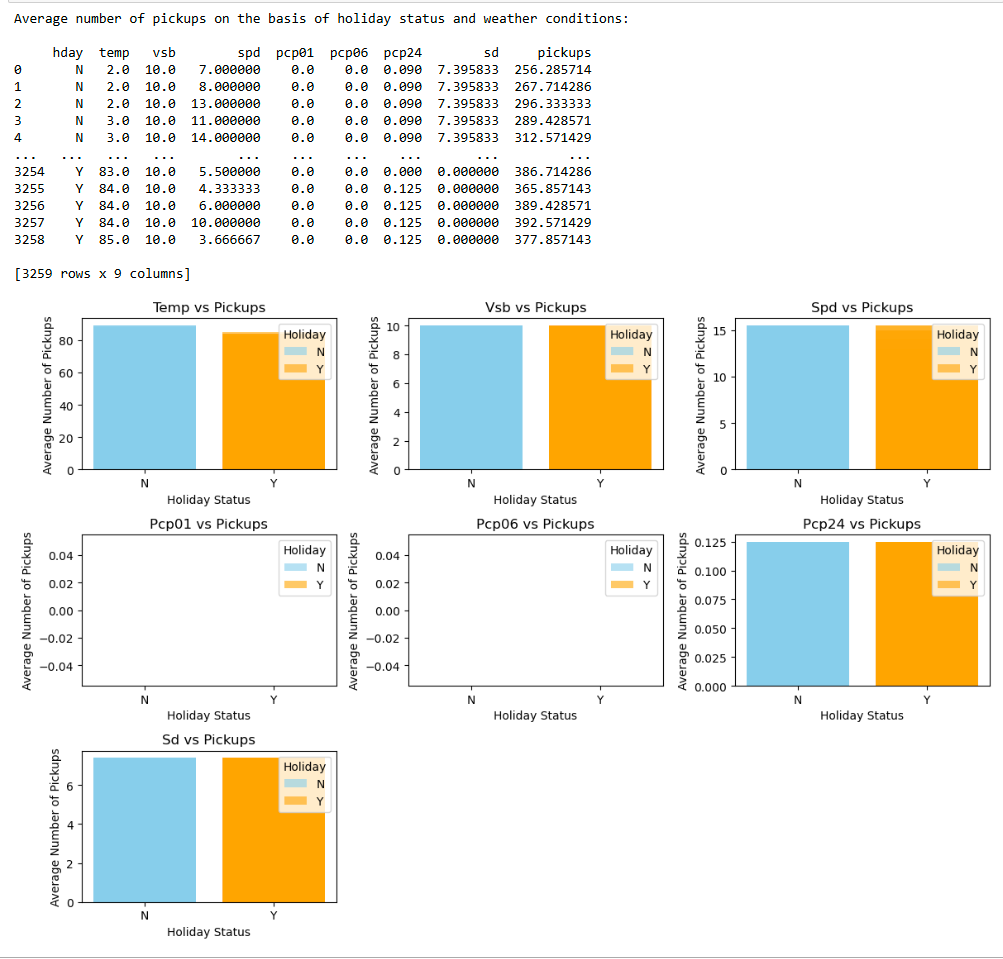

# 8- Growth Insights

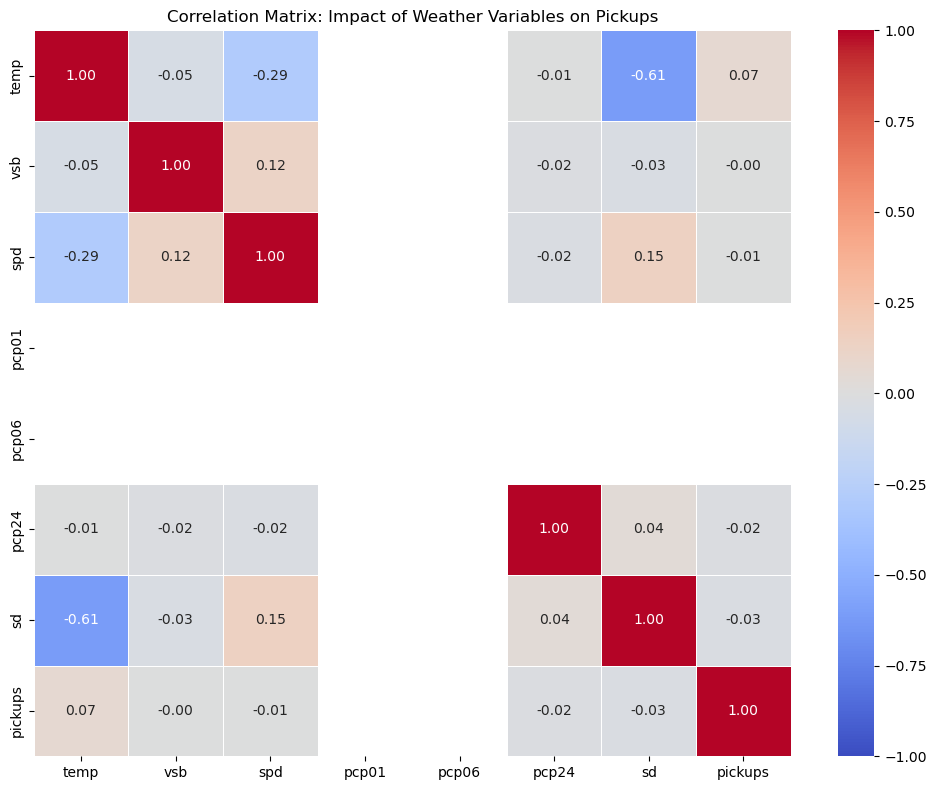

In [108]:
# Correlation matrix between weather variables and pickups
weather_vars = ['temp', 'vsb', 'spd', 'pcp01', 'pcp06', 'pcp24', 'sd']
weather_corr_matrix = df[weather_vars + ['pickups']].corr()

# Plotting correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(weather_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix: Impact of Weather Variables on Pickups')
plt.tight_layout()
plt.show()

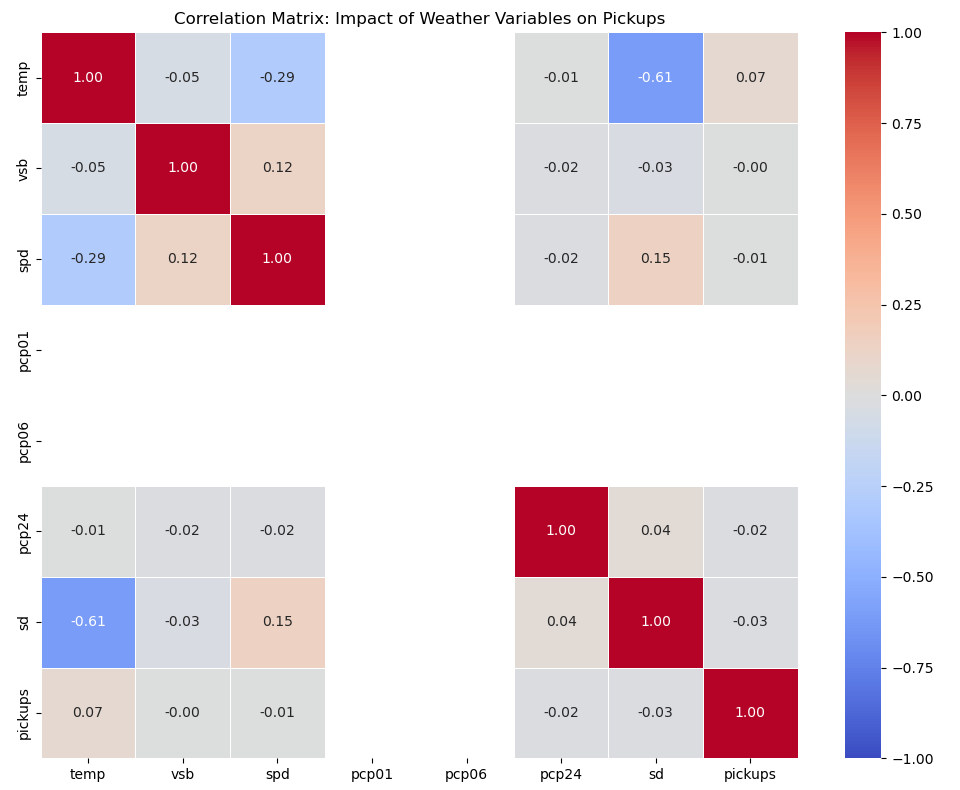


## Other than given questions I have tried many things in the EDA to do.
 

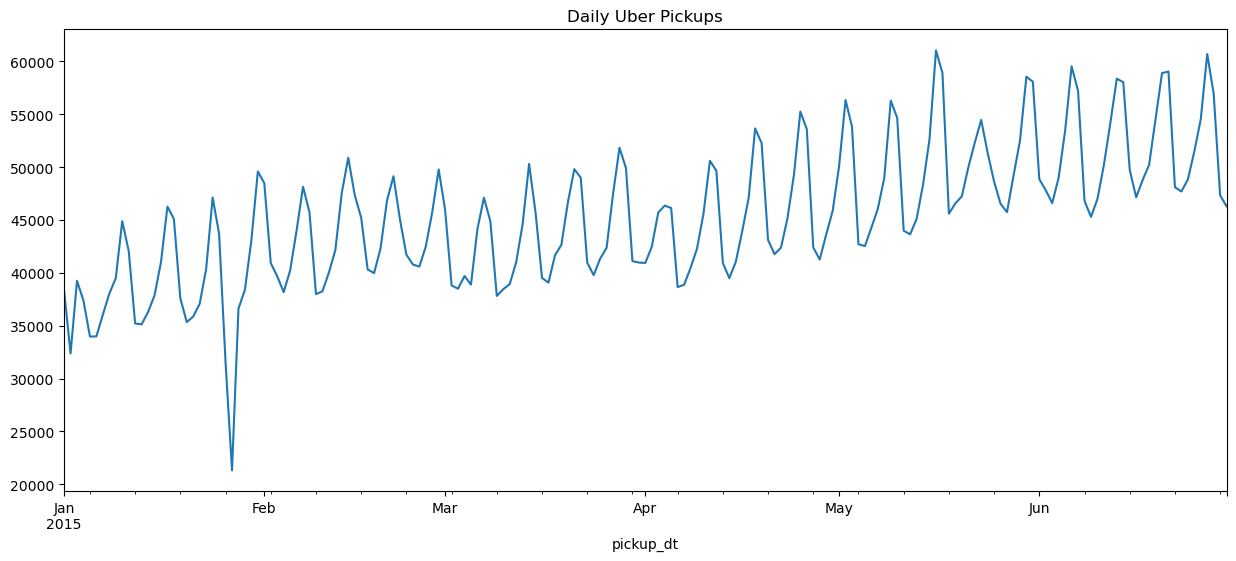

In [110]:
df.set_index('pickup_dt', inplace=True)
df['pickups'].resample('D').sum().plot(figsize=(15, 6))
plt.title('Daily Uber Pickups')
plt.show()


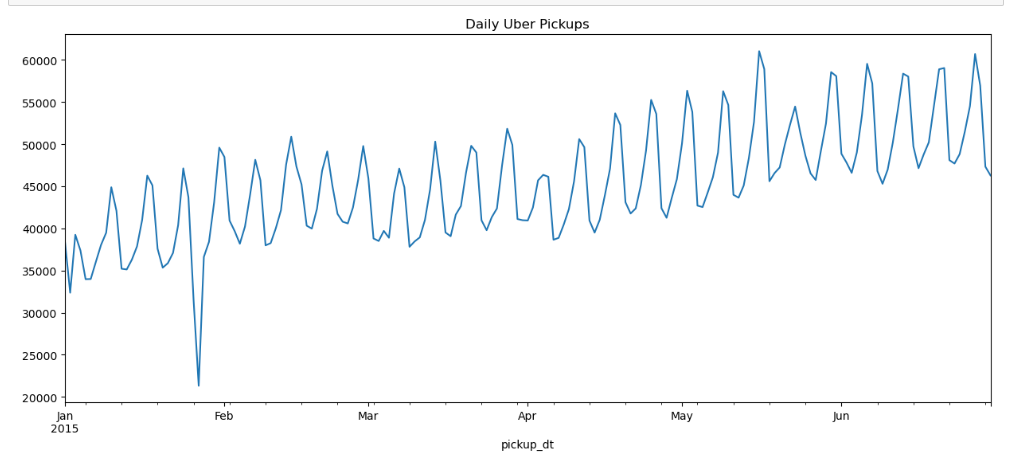

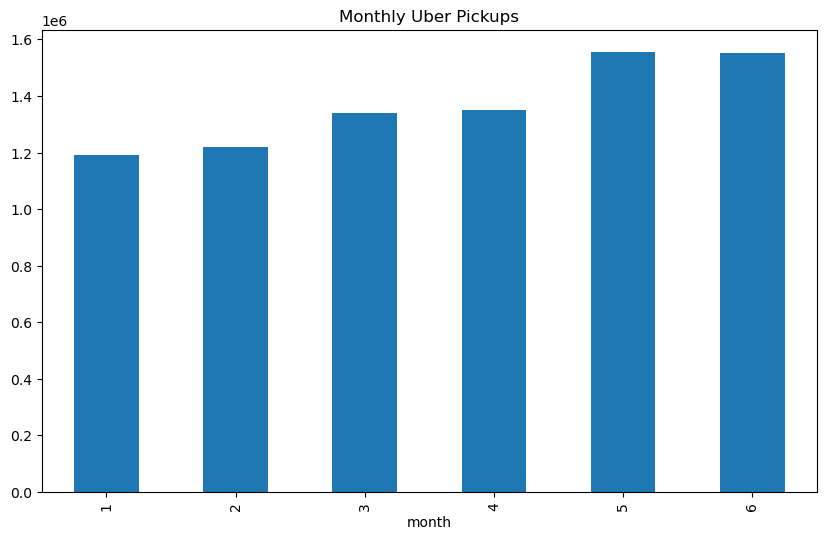

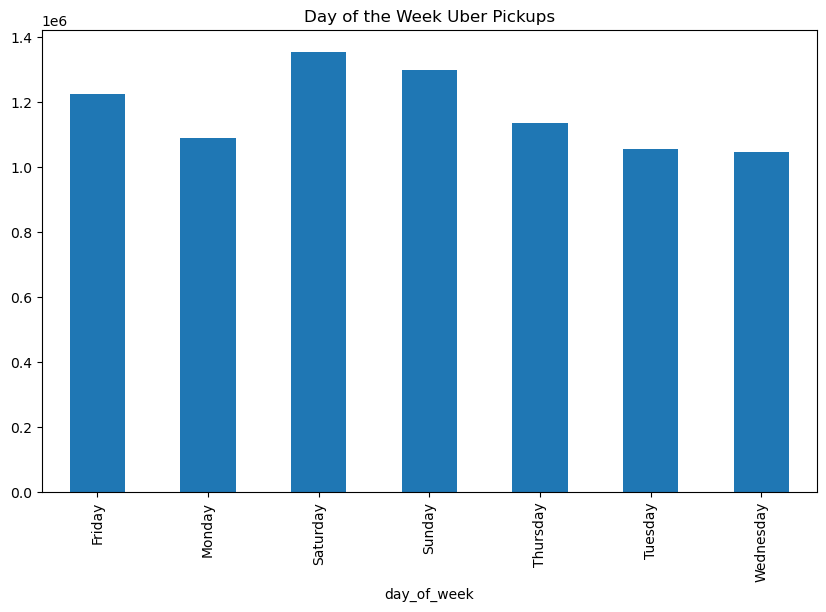

In [111]:
df['month'] = df.index.month
df['day_of_week'] = df.index.day_name()

seasonal_pickups = df.groupby('month')['pickups'].sum()
day_of_week_pickups = df.groupby('day_of_week')['pickups'].sum()

seasonal_pickups.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Uber Pickups')
plt.show()

day_of_week_pickups.plot(kind='bar', figsize=(10, 6))
plt.title('Day of the Week Uber Pickups')
plt.show()


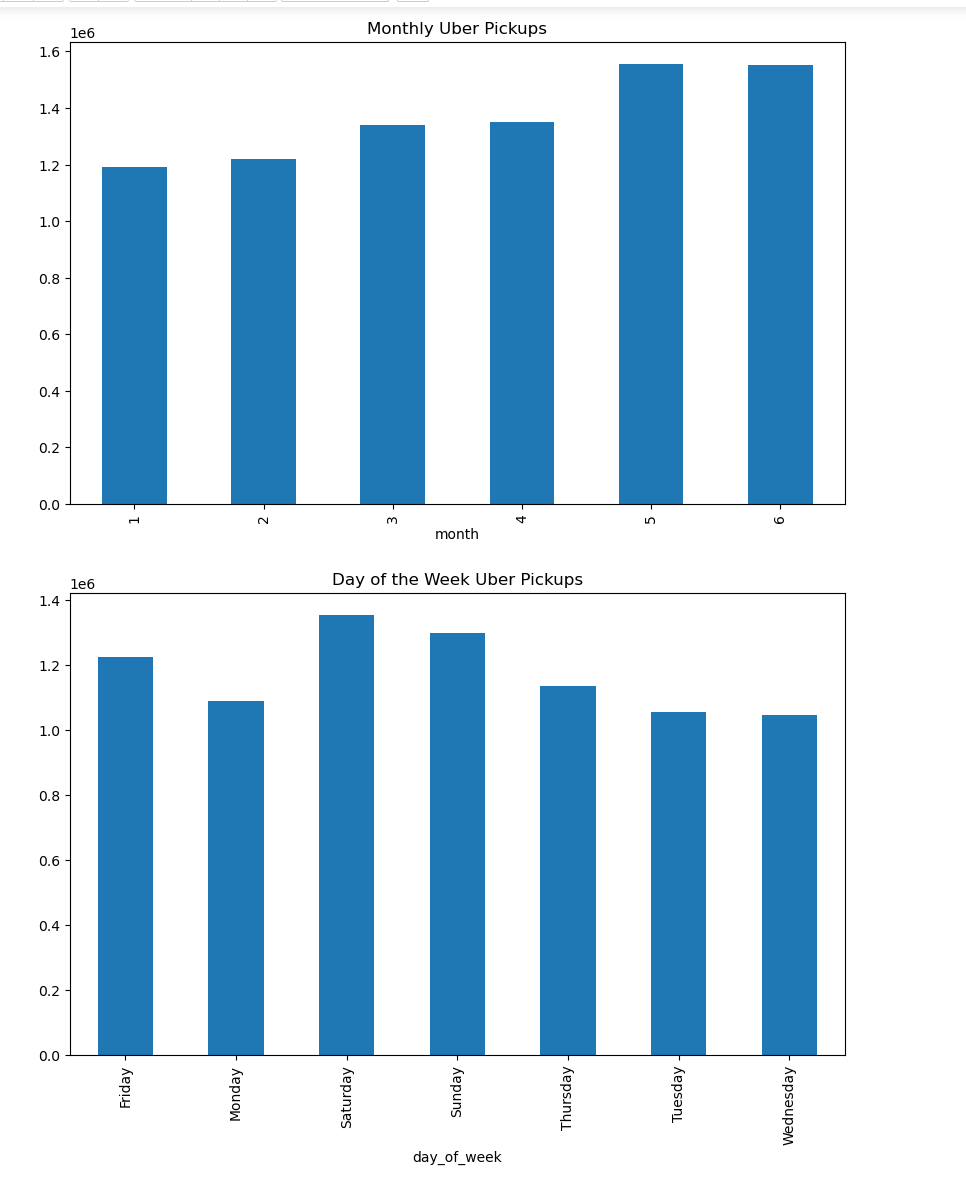